In [536]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import string
import io
from pandas.io.json import json_normalize


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Load URL, read CSV, and display as panda frame

In [537]:
moma_artworks_url = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv"

artworks = pd.read_csv(moma_artworks_url)

In [538]:
moma_artists_url = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artists.csv"

artists = pd.read_csv(moma_artists_url)

# Explore data

In [539]:
#get column, row to understand size of data
artists.shape 

(15715, 9)

In [540]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

In [541]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15715 entries, 0 to 15714
Data columns (total 9 columns):
ConstituentID    15715 non-null int64
DisplayName      15715 non-null object
ArtistBio        13443 non-null object
Nationality      13189 non-null object
Gender           12520 non-null object
BeginDate        15715 non-null int64
EndDate          15715 non-null int64
Wiki QID         3274 non-null object
ULAN             2940 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [542]:
#get column, row to understand size of data
artworks.shape 

(139018, 29)

In [543]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [544]:
artworks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139018 entries, 0 to 139017
Data columns (total 29 columns):
Title                 138979 non-null object
Artist                137705 non-null object
ConstituentID         137705 non-null object
ArtistBio             132872 non-null object
Nationality           137705 non-null object
BeginDate             137705 non-null object
EndDate               137705 non-null object
Gender                137705 non-null object
Date                  136788 non-null object
Medium                128232 non-null object
Dimensions            128670 non-null object
CreditLine            136497 non-null object
AccessionNumber       139018 non-null object
Classification        139018 non-null object
Department            139018 non-null object
DateAcquired          131865 non-null object
Cataloged             139018 non-null object
ObjectID              139018 non-null int64
URL                   82002 non-null object
ThumbnailURL          71940 non-null

# Create a master dataset (artists and artworks)

In [545]:
# rearrange artworks with Constituent ID at first
# use Consitituent ID as unique identifier to join two datasets

artworks = artworks[['ConstituentID', 'Title', 'Artist', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)']]

artworks.head()

ConstituentID                                              Title  \
0          6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1          7470  City of Music, National Superior Conservatory ...   
2          7605  Villa near Vienna Project, Outside Vienna, Aus...   
3          7056  The Manhattan Transcripts Project, New York, N...   
4          7605  Villa, project, outside Vienna, Austria, Exter...   

                     Artist                                  ArtistBio  \
0               Otto Wagner                      (Austrian, 1841–1918)   
1  Christian de Portzamparc                        (French, born 1944)   
2                Emil Hoppe                      (Austrian, 1876–1957)   
3           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
4                Emil Hoppe                      (Austrian, 1876–1957)   

  Nationality BeginDate EndDate  Gender  Date  \
0  (Austrian)    (1841)  (1918)  (Male)  1896   
1    (French)    (1944)     (0)  (Male)  1987   
2  (Austrian)    (1876)  (1957)  (Male)  1903   
3          ()    (1944)     (0)  (Male)  1980   
4  (Austrian)    (1876)  (1957)  (Male)  1903   

                                              Medium  ...  \
0      Ink and cut-and-pasted painted pages on paper  ...   
1                  Paint and colored pencil on print  ...   
2  Graphite, pen, color pencil, ink, and gouache ...  ...   
3  Photographic reproduction with colored synthet...  ...   
4  Graphite, color pencil, ink, and gouache on tr...  ...   

                                        ThumbnailURL Circumference (cm)  \
0  http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...                NaN   
1  http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...                NaN   
2  http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...                NaN   
3  http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...                NaN   
4  http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...                NaN   

  Depth (cm) Diameter (cm) Height (cm) Length (cm) Weight (kg)  Width (cm)  \
0        NaN           NaN     48.6000         NaN         NaN    168.9000   
1        NaN           NaN     40.6401         NaN         NaN     29.8451   
2        NaN           NaN     34.3000         NaN         NaN     31.8000   
3        NaN           NaN     50.8000         NaN         NaN     50.8000   
4        NaN           NaN     38.4000         NaN         NaN     19.1000   

  Seat Height (cm) Duration (sec.)  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  

[5 rows x 29 columns]

In [546]:
# change ConstituentID to string

artists['ConstituentID'] = artists['ConstituentID'].astype(str)

artists.dtypes

ConstituentID     object
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

In [547]:
artworks.dtypes

ConstituentID          object
Title                  object
Artist                 object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

# Join two datasets

In [548]:
# change both column names to be the same
artworks.rename(columns={'ConstituentID':'UniqueID'}, inplace = True)
artists.rename(columns={'ConstituentID':'UniqueID'}, inplace = True)

In [549]:
artworks.head(5)

UniqueID                                              Title  \
0     6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1     7470  City of Music, National Superior Conservatory ...   
2     7605  Villa near Vienna Project, Outside Vienna, Aus...   
3     7056  The Manhattan Transcripts Project, New York, N...   
4     7605  Villa, project, outside Vienna, Austria, Exter...   

                     Artist                                  ArtistBio  \
0               Otto Wagner                      (Austrian, 1841–1918)   
1  Christian de Portzamparc                        (French, born 1944)   
2                Emil Hoppe                      (Austrian, 1876–1957)   
3           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
4                Emil Hoppe                      (Austrian, 1876–1957)   

  Nationality BeginDate EndDate  Gender  Date  \
0  (Austrian)    (1841)  (1918)  (Male)  1896   
1    (French)    (1944)     (0)  (Male)  1987   
2  (Austrian)    (1876)  (1957)  (Male)  1903   
3          ()    (1944)     (0)  (Male)  1980   
4  (Austrian)    (1876)  (1957)  (Male)  1903   

                                              Medium  ...  \
0      Ink and cut-and-pasted painted pages on paper  ...   
1                  Paint and colored pencil on print  ...   
2  Graphite, pen, color pencil, ink, and gouache ...  ...   
3  Photographic reproduction with colored synthet...  ...   
4  Graphite, color pencil, ink, and gouache on tr...  ...   

                                        ThumbnailURL Circumference (cm)  \
0  http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...                NaN   
1  http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...                NaN   
2  http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...                NaN   
3  http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...                NaN   
4  http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...                NaN   

  Depth (cm) Diameter (cm) Height (cm) Length (cm) Weight (kg)  Width (cm)  \
0        NaN           NaN     48.6000         NaN         NaN    168.9000   
1        NaN           NaN     40.6401         NaN         NaN     29.8451   
2        NaN           NaN     34.3000         NaN         NaN     31.8000   
3        NaN           NaN     50.8000         NaN         NaN     50.8000   
4        NaN           NaN     38.4000         NaN         NaN     19.1000   

  Seat Height (cm) Duration (sec.)  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  

[5 rows x 29 columns]

In [550]:
artists.head(5)

UniqueID      DisplayName            ArtistBio Nationality Gender  \
0        1   Robert Arneson  American, 1930–1992    American   Male   
1        2   Doroteo Arnaiz   Spanish, born 1936     Spanish   Male   
2        3      Bill Arnold  American, born 1941    American   Male   
3        4  Charles Arnoldi  American, born 1946    American   Male   
4        5      Per Arnoldi    Danish, born 1941      Danish   Male   

   BeginDate  EndDate  Wiki QID         ULAN  
0       1930     1992       NaN          NaN  
1       1936        0       NaN          NaN  
2       1941        0       NaN          NaN  
3       1946        0  Q1063584  500027998.0  
4       1941        0       NaN          NaN

In [551]:
# join by Unique ID
artists_columns = ['UniqueID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender', 'BeginDate','EndDate']
master = pd.merge(artworks, artists, on='UniqueID', how='outer')
master.shape

(143105, 37)

In [552]:
# sanity check on the problem of duplicates by creating another master dataframe 
# whereby total count of each UniqueID in artists vs artworks is checked first
# Dedup column is the total count of 
# GroupBy.cumcount(self, ascending: bool = True)
# Number each item in each group from 0 to the length of that group - 1.
artworks['Dedup'] = artworks.groupby('UniqueID').cumcount(ascending=False)
artists['Dedup'] = artists.groupby('UniqueID').cumcount(ascending=False)
draft = pd.merge(artworks, artists, on=['UniqueID', 'Dedup'], how='outer')
draft.shape

(143105, 38)

In [553]:
draft.head(10)

UniqueID                                              Title  \
0     6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1     7470  City of Music, National Superior Conservatory ...   
2     7605  Villa near Vienna Project, Outside Vienna, Aus...   
3     7056  The Manhattan Transcripts Project, New York, N...   
4     7605  Villa, project, outside Vienna, Austria, Exter...   
5     7056  The Manhattan Transcripts Project, New York, N...   
6     7056  The Manhattan Transcripts Project, New York, N...   
7     7056  The Manhattan Transcripts Project, New York, N...   
8     7056  The Manhattan Transcripts Project, New York, N...   
9     7056  The Manhattan Transcripts Project, New York, N...   

                     Artist                                ArtistBio_x  \
0               Otto Wagner                      (Austrian, 1841–1918)   
1  Christian de Portzamparc                        (French, born 1944)   
2                Emil Hoppe                      (Austrian, 1876–1957)   
3           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
4                Emil Hoppe                      (Austrian, 1876–1957)   
5           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
6           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
7           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
8           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   
9           Bernard Tschumi  (French and Swiss, born Switzerland 1944)   

  Nationality_x BeginDate_x EndDate_x Gender_x     Date  \
0    (Austrian)      (1841)    (1918)   (Male)     1896   
1      (French)      (1944)       (0)   (Male)     1987   
2    (Austrian)      (1876)    (1957)   (Male)     1903   
3            ()      (1944)       (0)   (Male)     1980   
4    (Austrian)      (1876)    (1957)   (Male)     1903   
5            ()      (1944)       (0)   (Male)  1976-77   
6            ()      (1944)       (0)   (Male)  1976-77   
7            ()      (1944)       (0)   (Male)  1976-77   
8            ()      (1944)       (0)   (Male)  1976-77   
9            ()      (1944)       (0)   (Male)  1976-77   

                                              Medium  ... Duration (sec.)  \
0      Ink and cut-and-pasted painted pages on paper  ...             NaN   
1                  Paint and colored pencil on print  ...             NaN   
2  Graphite, pen, color pencil, ink, and gouache ...  ...             NaN   
3  Photographic reproduction with colored synthet...  ...             NaN   
4  Graphite, color pencil, ink, and gouache on tr...  ...             NaN   
5                          Gelatin silver photograph  ...             NaN   
6                         Gelatin silver photographs  ...             NaN   
7                          Gelatin silver photograph  ...             NaN   
8                          Gelatin silver photograph  ...             NaN   
9                          Gelatin silver photograph  ...             NaN   

  Dedup DisplayName          ArtistBio_y Nationality_y Gender_y BeginDate_y  \
0     3         NaN                  NaN           NaN      NaN         NaN   
1    20         NaN                  NaN           NaN      NaN         NaN   
2     1         NaN                  NaN           NaN      NaN         NaN   
3    60         NaN                  NaN           NaN      NaN         NaN   
4     0  Emil Hoppe  Austrian, 1876–1957      Austrian     Male      1876.0   
5    59         NaN                  NaN           NaN      NaN         NaN   
6    58         NaN                  NaN           NaN      NaN         NaN   
7    57         NaN                  NaN           NaN      NaN         NaN   
8    56         NaN                  NaN           NaN      NaN         NaN   
9    55         NaN                  NaN           NaN      NaN         NaN   

   EndDate_y  Wiki QID         ULAN  
0        NaN       NaN          NaN  
1        NaN       NaN     

In [554]:
master.head(10)

UniqueID                                              Title  \
0     6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1     6210                                           Armchair   
2     6210                                              Stool   
3     6210                                            Railing   
4     7470  City of Music, National Superior Conservatory ...   
5     7470             LVMH Tower, New York, NY (Study model)   
6     7470             LVMH Tower, New York, NY (Study model)   
7     7470             LVMH Tower, New York, NY (Study model)   
8     7470              LVMH Tower, New York, NY, Study model   
9     7470             LVMH Tower, New York, NY (Study model)   

                     Artist            ArtistBio_x Nationality_x BeginDate_x  \
0               Otto Wagner  (Austrian, 1841–1918)    (Austrian)      (1841)   
1               Otto Wagner  (Austrian, 1841–1918)    (Austrian)      (1841)   
2               Otto Wagner  (Austrian, 1841–1918)    (Austrian)      (1841)   
3               Otto Wagner  (Austrian, 1841–1918)    (Austrian)      (1841)   
4  Christian de Portzamparc    (French, born 1944)      (French)      (1944)   
5  Christian de Portzamparc    (French, born 1944)      (French)      (1944)   
6  Christian de Portzamparc    (French, born 1944)      (French)      (1944)   
7  Christian de Portzamparc    (French, born 1944)      (French)      (1944)   
8  Christian de Portzamparc    (French, born 1944)      (French)      (1944)   
9  Christian de Portzamparc    (French, born 1944)      (French)      (1944)   

  EndDate_x Gender_x       Date  \
0    (1918)   (Male)       1896   
1    (1918)   (Male)       1902   
2    (1918)   (Male)       1904   
3    (1918)   (Male)       1899   
4       (0)   (Male)       1987   
5       (0)   (Male)  1994-1999   
6       (0)   (Male)  1994–1999   
7       (0)   (Male)  1994–1999   
8       (0)   (Male)  1994–1999   
9       (0)   (Male)  1994–1999   

                                          Medium  ... Seat Height (cm)  \
0  Ink and cut-and-pasted painted pages on paper  ...              NaN   
1                        Beech wood and aluminum  ...              NaN   
2  Bent beech wood, molded plywood, and aluminum  ...              NaN   
3                              Painted cast-iron  ...              NaN   
4              Paint and colored pencil on print  ...              NaN   
5                            Paper and cardboard  ...              NaN   
6                            Paper and cardboard  ...              NaN   
7                            Paper and cardboard  ...              NaN   
8                            Paper and cardboard  ...              NaN   
9                            Paper and cardboard  ...              NaN   

  Duration (sec.)               DisplayName          ArtistBio_y  \
0             NaN               Otto Wagner  Austrian, 1841–1918   
1             NaN               Otto Wagner  Austrian, 1841–1918   
2             NaN               Otto Wagner  Austrian, 1841–1918   
3             NaN               Otto Wagner  Austrian, 1841–1918   
4             NaN  Christian de Portzamparc    French, born 1944   
5             NaN  Christian de Portzamparc    French, born 1944   
6             NaN  Christian de Portzamparc    French, born 1944   
7             NaN  Christian de Portzamparc    French, born 1944   
8             NaN  Christian de Portzamparc    French, born 1944   
9             NaN  Christian de Portzamparc    French, born 1944   

  Nationality_y Gender_y BeginDate_y  EndDate_y Wiki QID         ULAN  
0      Austrian     Male      1841.0     1918.0   Q84287  500016971.0  
1      Austrian     Male      1841.0     1918.0   Q84287  500016971.0  
2      Austrian     Male      1841.0     1918.0   Q84287  500016971.0  
3      Austrian     Male      1841.0     1918.0   Q84287  500016971.0  
4        French     Male      1944.0        0.0  Q312838  500024982.0  
5        French     Mal

In [555]:
# rearrange columns of master

master.columns

master = master[['UniqueID', 'Title', 'Artist', 'ArtistBio_x', 'ArtistBio_y', 'Gender_x', 'Gender_y', 'Nationality_x', 'Nationality_y', 'BeginDate_x',
       'EndDate_x', 'BeginDate_y', 'EndDate_y', 'DisplayName', 'Date', 'Medium', 'Dimensions', 'CreditLine',
       'AccessionNumber', 'Classification', 'Department', 'DateAcquired',
       'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL', 'Circumference (cm)',
       'Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)',
       'Weight (kg)', 'Width (cm)', 'Seat Height (cm)', 'Duration (sec.)',
       'Wiki QID', 'ULAN']]

master.head(10)

UniqueID                                              Title  \
0     6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1     6210                                           Armchair   
2     6210                                              Stool   
3     6210                                            Railing   
4     7470  City of Music, National Superior Conservatory ...   
5     7470             LVMH Tower, New York, NY (Study model)   
6     7470             LVMH Tower, New York, NY (Study model)   
7     7470             LVMH Tower, New York, NY (Study model)   
8     7470              LVMH Tower, New York, NY, Study model   
9     7470             LVMH Tower, New York, NY (Study model)   

                     Artist            ArtistBio_x          ArtistBio_y  \
0               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
1               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
2               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
3               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
4  Christian de Portzamparc    (French, born 1944)    French, born 1944   
5  Christian de Portzamparc    (French, born 1944)    French, born 1944   
6  Christian de Portzamparc    (French, born 1944)    French, born 1944   
7  Christian de Portzamparc    (French, born 1944)    French, born 1944   
8  Christian de Portzamparc    (French, born 1944)    French, born 1944   
9  Christian de Portzamparc    (French, born 1944)    French, born 1944   

  Gender_x Gender_y Nationality_x Nationality_y BeginDate_x  ... Depth (cm)  \
0   (Male)     Male    (Austrian)      Austrian      (1841)  ...        NaN   
1   (Male)     Male    (Austrian)      Austrian      (1841)  ...    51.5000   
2   (Male)     Male    (Austrian)      Austrian      (1841)  ...    40.6401   
3   (Male)     Male    (Austrian)      Austrian      (1841)  ...     7.6000   
4   (Male)     Male      (French)        French      (1944)  ...        NaN   
5   (Male)     Male      (French)        French      (1944)  ...    30.0000   
6   (Male)     Male      (French)        French      (1944)  ...    30.0000   
7   (Male)     Male      (French)        French      (1944)  ...    30.0000   
8   (Male)     Male      (French)        French      (1944)  ...    30.0000   
9   (Male)     Male      (French)        French      (1944)  ...    30.0000   

   Diameter (cm)  Height (cm) Length (cm) Weight (kg) Width (cm)  \
0            NaN      48.6000         NaN         NaN   168.9000   
1            NaN      78.5000         NaN         NaN    56.5000   
2            NaN      46.9901         NaN         NaN    40.6401   
3            NaN      72.4000         NaN         NaN   117.5000   
4            NaN      40.6401         NaN         NaN    29.8451   
5            NaN     100.0000         NaN         NaN    19.0000   
6            NaN     100.0000         NaN         NaN    19.0000   
7            NaN     100.0000         NaN         NaN    19.0000   
8            NaN     100.0000         NaN         NaN    19.0000   
9            NaN     100.0000         NaN         NaN    19.0000   

  Seat Height (cm) Duration (sec.) Wiki QID         ULAN  
0              NaN             NaN   Q84287  500016971.0  
1              NaN             NaN   Q84287  500016971.0  
2              NaN             NaN   Q84287  500016971.0  
3              NaN             NaN   Q84287  500016971.0  
4              NaN             NaN  Q312838  500024982.0  
5              NaN             NaN  Q312838  500024982.0  
6              NaN             NaN  Q312838  500024982.0  
7              NaN             NaN  Q312838  500024982.0  
8              NaN             NaN  Q312838  500024982.0  
9              NaN             NaN  Q312838  500024982.0  

[10 rows x 37 columns]

# Data Cleaning: drop nulls, deduplication, data types, unique counts, and classification

## Make a copy of master and remove duplicated columns 

In [556]:
# make copy

master_copy = master
master_copy.head(5)

UniqueID                                              Title  \
0     6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1     6210                                           Armchair   
2     6210                                              Stool   
3     6210                                            Railing   
4     7470  City of Music, National Superior Conservatory ...   

                     Artist            ArtistBio_x          ArtistBio_y  \
0               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
1               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
2               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
3               Otto Wagner  (Austrian, 1841–1918)  Austrian, 1841–1918   
4  Christian de Portzamparc    (French, born 1944)    French, born 1944   

  Gender_x Gender_y Nationality_x Nationality_y BeginDate_x  ... Depth (cm)  \
0   (Male)     Male    (Austrian)      Austrian      (1841)  ...        NaN   
1   (Male)     Male    (Austrian)      Austrian      (1841)  ...    51.5000   
2   (Male)     Male    (Austrian)      Austrian      (1841)  ...    40.6401   
3   (Male)     Male    (Austrian)      Austrian      (1841)  ...     7.6000   
4   (Male)     Male      (French)        French      (1944)  ...        NaN   

   Diameter (cm)  Height (cm) Length (cm) Weight (kg) Width (cm)  \
0            NaN      48.6000         NaN         NaN   168.9000   
1            NaN      78.5000         NaN         NaN    56.5000   
2            NaN      46.9901         NaN         NaN    40.6401   
3            NaN      72.4000         NaN         NaN   117.5000   
4            NaN      40.6401         NaN         NaN    29.8451   

  Seat Height (cm) Duration (sec.) Wiki QID         ULAN  
0              NaN             NaN   Q84287  500016971.0  
1              NaN             NaN   Q84287  500016971.0  
2              NaN             NaN   Q84287  500016971.0  
3              NaN             NaN   Q84287  500016971.0  
4              NaN             NaN  Q312838  500024982.0  

[5 rows x 37 columns]

In [557]:
# remove duplicated columns "_x" and keep "_y"
master_copy = master_copy.drop(['ArtistBio_x', 'ArtistBio_y', 'Gender_x', 'Nationality_x', 'BeginDate_x', 'EndDate_x', 'DisplayName'], axis=1)

In [558]:
# rename columns for readability

master_copy.rename(columns={'Nationality_y':'Nationality', 'Gender_y':'Gender',
                        'BeginDate_y': 'Birth', 'EndDate_y': 'Death'}, inplace = True)

# Time

In [559]:
# time function - to standardize date, begin/end date, acquisition date

#https://www.dataquest.io/blog/data-cleaning-with-python/
    
# Pattern 1: “1976-77” (year ranges)
# Pattern 2: “c. 1917”
# Pattern 3: “Unknown”
# Pattern 4: “n.d.”

master_copy['Date'].value_counts(dropna=False).head(1000)

NaN                     6317
1967                    1855
1971                    1830
1966                    1659
1968                    1616
                        ... 
1970, published 1971      10
1959, published 1960      10
(1921-22)                 10
1957-1960                 10
1989–90                   10
Name: Date, Length: 1000, dtype: int64

In [560]:
def strip_punctuation(row):
    # turn each start date into string 
    start_date = str(row['Date'])
    # remove any whitespace outside of the start up
    start_date = start_date.strip()
    # replace inside whitespace with punctuation
    start_date = start_date.replace(" ", "?")
    # separate start date into 2 elemtns if "-" is found
    final_date = start_date.translate(str.maketrans({a: None for a in string.punctuation}))
    return final_date

# assign the results of " strip_punctuation" to the 'Date' column
# for Pandas to go row-wise so we set "axis = 1"
# for Pandas to go column-wise so we set "axis = 0"

master_copy['Date'] = master_copy.apply(lambda row: strip_punctuation(row), axis=1)
master_copy['Date'].value_counts()

nan                            6317
1967                           1950
1966                           1881
1971                           1861
1968                           1736
                               ... 
January7131970                    1
November201912                    1
185082                            1
Designed1930thisexample1976       1
c194853                           1
Name: Date, Length: 8612, dtype: int64

In [561]:
# for some reason the above function does not remove '-'

def split_dates(row):
    # start date contains the current value for the Date column
    start_date = str(row['Date'])
    # split start_date into two elements if "-" is found 
    # remove - again
    split_date = start_date.split('-')
    # if a "-" is found, split_date will contain a list with at least two items
    # else not found, split_date will have 1 item, the initial_date
    # use final_date from previous function's list
    if len(split_date) >1:
        final_date = split_date[0]
    else:
        final_date = start_date
    return final_date

master_copy['Date'] = master_copy.apply(lambda row: split_dates(row), axis=1)
master_copy['Date'].value_counts()

nan                            6317
1967                           1950
1966                           1881
1971                           1861
1968                           1736
                               ... 
January7131970                    1
November201912                    1
185082                            1
Designed1930thisexample1976       1
c194853                           1
Name: Date, Length: 8612, dtype: int64

In [562]:
# delete rows with letters

master_copy = master_copy[~master_copy['Date'].str.contains("[a-zA-Z]").fillna(False)]

In [563]:
master_copy['Date'].value_counts()

1967         1950
1966         1881
1971         1861
1968         1736
1965         1679
             ... 
19851987        1
191558          1
1999–2003       1
196366          1
1968–71         1
Name: Date, Length: 2145, dtype: int64

In [564]:
master_copy['Date'].dtypes

dtype('O')

In [565]:
# drop dates with len() < 4 or > 4
# year is 4 digit

def drop_dates(row):
    # start date contains the current value for the Date column
    start_date = row['Date']
    
    # if larger than 4 digits, then drop above four digits
    # if less than 4 digits, then keep the 4 digit format
    # anything else, keep the same 4 digit format
    
    if len(start_date) > 4:
        final_date = np.NaN
    elif len(start_date) < 4:
        final_date = np.NaN
    else:
        final_date = start_date
    
    return final_date

In [566]:
# assign the results of " drop_dates" to the 'Date' column
# for Pandas to go row-wise so we set "axis = 1"
# for Pandas to go column-wise so we set "axis = 0"
master_copy['Date'] = master_copy.apply(lambda row: drop_dates(row), axis=1)
master_copy['Date'].value_counts()

1967    1950
1966    1881
1971    1861
1968    1736
1965    1679
        ... 
1809       1
1848       1
1842       1
1805       1
1811       1
Name: Date, Length: 186, dtype: int64

In [567]:
# delete those two rows where the 'Date' is an error = 4271
master_copy = master_copy[master_copy.Date != '4271']

In [568]:
master_copy['Date'].sort_values()

9707      1768
9711      1768
9708      1768
9710      1768
9709      1768
          ... 
138980     NaN
138981     NaN
138982     NaN
138999     NaN
139004     NaN
Name: Date, Length: 113008, dtype: object

In [569]:
master_copy['Date'].dropna()

0         1896
1         1902
2         1904
3         1899
4         1987
          ... 
139012    2019
139013    2018
139014    2019
139015    2019
139016    2018
Name: Date, Length: 93508, dtype: object

In [570]:
# convert back to float
master_copy['Date'] = master_copy['Date'].astype(float)
master_copy['Date'].dtype

dtype('float64')

In [571]:
master_copy['DateAcquired'].value_counts(dropna=False).head(20)
    
# convert to pandas

1964-10-06    9717
NaN           5203
1968-03-06    4534
2008-10-08    3115
2005-05-10    2546
2001-01-24    1814
1940-04-05    1140
1949-09-29     905
1965-11-09     847
2000-10-12     847
2013-10-24     826
1974-01-10     820
2018-11-05     787
2015-10-27     688
2012-10-03     685
2019-04-04     636
2008-06-18     635
2015-05-28     608
2014-10-06     604
1967-10-18     560
Name: DateAcquired, dtype: int64

In [572]:
master_copy['DateAcquired'] = master_copy['DateAcquired'].astype(str)

In [573]:
master_copy['DateAcquired'] = pd.to_datetime(master_copy['DateAcquired'], infer_datetime_format=True, errors = 'coerce')

In [574]:
master_copy['DateAcquired_Year'] = master_copy['DateAcquired'].dt.year

In [575]:
master_copy['DateAcquired_Month'] = master_copy['DateAcquired'].dt.month

In [576]:
master_copy.dtypes

UniqueID                      object
Title                         object
Artist                        object
Gender                        object
Nationality                   object
Birth                        float64
Death                        float64
Date                         float64
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                     float64
URL                           object
ThumbnailURL                  object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
Width (cm)                   float64
Seat Height (cm)             float64
D

In [577]:
master_copy['DateAcquired_Year'].sort_values()

105304    1929.0
34584     1929.0
33868     1929.0
17196     1929.0
33890     1929.0
           ...  
138038       NaN
138039       NaN
138794       NaN
138836       NaN
138909       NaN
Name: DateAcquired_Year, Length: 113008, dtype: float64

In [578]:
master_copy['Date'] = master_copy['Date'].astype(float)

# Birth

In [579]:
master_copy['Birth'].value_counts(ascending=False)

0.0       4680
1857.0    4563
1911.0    3678
1886.0    2730
1934.0    2133
          ... 
2000.0       1
1996.0       1
1994.0       1
1993.0       1
1789.0       1
Name: Birth, Length: 215, dtype: int64

In [580]:
master_copy['Birth'].value_counts(dropna=False).head(1000)

NaN       6960
0.0       4680
1857.0    4563
1911.0    3678
1886.0    2730
          ... 
1996.0       1
2012.0       1
2007.0       1
2000.0       1
1789.0       1
Name: Birth, Length: 216, dtype: int64

In [581]:
master_copy['Birth'] = master_copy['Birth'].astype(str)
master_copy = master_copy[~master_copy['Birth'].str.contains("[a-zA-Z]").fillna(False)]

In [582]:
master_copy['Birth'].value_counts(ascending=False)

0.0       4680
1857.0    4563
1911.0    3678
1886.0    2730
1934.0    2133
          ... 
1850.0       1
1996.0       1
2000.0       1
2012.0       1
1731.0       1
Name: Birth, Length: 215, dtype: int64

In [583]:
master_copy['Birth'].dropna()

0         1841.0
1         1841.0
2         1841.0
3         1841.0
4         1944.0
           ...  
139006    1945.0
139013    1976.0
139014    1983.0
139015    1979.0
139016    1972.0
Name: Birth, Length: 106048, dtype: object

In [584]:
master_copy['Birth'].value_counts(ascending=False)

0.0       4680
1857.0    4563
1911.0    3678
1886.0    2730
1934.0    2133
          ... 
1850.0       1
1996.0       1
2000.0       1
2012.0       1
1731.0       1
Name: Birth, Length: 215, dtype: int64

In [585]:
# convert back to float
master_copy['Birth'] = master_copy['Birth'].astype(float)
master_copy['Birth'].dtype

dtype('float64')

# Death

In [586]:
master_copy['Death'].value_counts(ascending=False)

0.0       39856
1927.0     4623
2010.0     3687
1985.0     3103
1969.0     2508
          ...  
1859.0        1
1888.0        1
1881.0        1
1905.0        1
1899.0        1
Name: Death, Length: 162, dtype: int64

In [587]:
master_copy['Death'].value_counts(dropna=False).head(1000)

0.0       39856
1927.0     4623
2010.0     3687
1985.0     3103
1969.0     2508
          ...  
1859.0        1
1888.0        1
1881.0        1
1905.0        1
1899.0        1
Name: Death, Length: 162, dtype: int64

In [588]:
master_copy['Death'] = master_copy['Death'].astype(str)
master_copy = master_copy[~master_copy['Death'].str.contains("[a-zA-Z]").fillna(False)]

In [589]:
master_copy['Death'].value_counts(ascending=False)

0.0       39856
1927.0     4623
2010.0     3687
1985.0     3103
1969.0     2508
          ...  
1888.0        1
1881.0        1
1905.0        1
1899.0        1
1859.0        1
Name: Death, Length: 162, dtype: int64

In [590]:
master_copy['Death'].dropna()

0         1918.0
1         1918.0
2         1918.0
3         1918.0
4            0.0
           ...  
139006       0.0
139013       0.0
139014       0.0
139015       0.0
139016       0.0
Name: Death, Length: 106048, dtype: object

In [591]:
# convert back to float
master_copy['Death'] = master_copy['Death'].astype(float)
master_copy['Death'].dtype

dtype('float64')

In [592]:
master_copy['Death'].value_counts(ascending=False)

0.0       39856
1927.0     4623
2010.0     3687
1985.0     3103
1969.0     2508
          ...  
1859.0        1
1888.0        1
1881.0        1
1905.0        1
1899.0        1
Name: Death, Length: 162, dtype: int64

In [593]:
master_copy['Date'].value_counts(ascending=False)

1967.0    1798
1966.0    1693
1965.0    1592
1968.0    1492
1973.0    1478
          ... 
1845.0       1
1842.0       1
1811.0       1
1809.0       1
1805.0       1
Name: Date, Length: 185, dtype: int64

# Gender

In [1088]:
# Gender

master_copy['Gender'].value_counts(dropna=False).head(20)

# convert males/females to Male/Female, and tally up

master_copy['Gender'].replace('male', 'Male', inplace=True)
master_copy['Gender'].replace('female', 'Female', inplace=True)


master_copy.shape

(105965, 46)

In [1089]:
master_copy['Gender'].describe()

count     101871
unique         3
top         Male
freq       86395
Name: Gender, dtype: object

In [1409]:
# Gender filtered Dataframes
female = master_copy[(master_copy['Gender'] == 'Female')]
male = master_copy[(master_copy['Gender'] == 'Male')]

# Nationality

In [597]:
# nationality

master_copy['Nationality'].value_counts(dropna=False).head(500)

American      46871
French        19703
German         7527
British        4772
NaN            2519
              ...  
Guyanese          1
Kuwaiti           1
Nicaraguan        1
Iraqi             1
Syrian            1
Name: Nationality, Length: 117, dtype: int64

In [598]:
master_copy['Nationality'].describe()

count       103529
unique         116
top       American
freq         46871
Name: Nationality, dtype: object

In [1]:
master_copy['Nationality_Am'] = master_copy['Nationality_Am'].replace({True:'American', False:'International'})

NameError: name 'master_copy' is not defined

In [601]:
master_copy['Nationality_Am'].value_counts(dropna=False).head(20)

International    56656
American         46873
NaN               2519
Name: Nationality_Am, dtype: int64

In [602]:
master_copy.head(5)

UniqueID                                              Title  \
0     6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1     6210                                           Armchair   
2     6210                                              Stool   
3     6210                                            Railing   
4     7470  City of Music, National Superior Conservatory ...   

                     Artist Gender Nationality   Birth   Death    Date  \
0               Otto Wagner   Male    Austrian  1841.0  1918.0  1896.0   
1               Otto Wagner   Male    Austrian  1841.0  1918.0  1902.0   
2               Otto Wagner   Male    Austrian  1841.0  1918.0  1904.0   
3               Otto Wagner   Male    Austrian  1841.0  1918.0  1899.0   
4  Christian de Portzamparc   Male      French  1944.0     0.0  1987.0   

                                          Medium  \
0  Ink and cut-and-pasted painted pages on paper   
1                        Beech wood and aluminum   
2  Bent beech wood, molded plywood, and aluminum   
3                              Painted cast-iron   
4              Paint and colored pencil on print   

                                          Dimensions  ... Length (cm)  \
0                 19 1/8 x 66 1/2" (48.6 x 168.9 cm)  ...         NaN   
1  30 7/8 x 22 1/4 x 20 1/4" (78.5 x 56.5 x 51.5 ...  ...         NaN   
2            18 1/2 x 16 x 16" (47 x 40.6 x 40.6 cm)  ...         NaN   
3       28 1/4 x 46 1/2 x 3" (72.4 x 117.5 x 7.6 cm)  ...         NaN   
4                      16 x 11 3/4" (40.6 x 29.8 cm)  ...         NaN   

  Weight (kg) Width (cm) Seat Height (cm) Duration (sec.) Wiki QID  \
0         NaN   168.9000              NaN             NaN   Q84287   
1         NaN    56.5000              NaN             NaN   Q84287   
2         NaN    40.6401              NaN             NaN   Q84287   
3         NaN   117.5000              NaN             NaN   Q84287   
4         NaN    29.8451              NaN             NaN  Q312838   

          ULAN DateAcquired_Year DateAcquired_Month  Nationality_Am  
0  500016971.0            1996.0                4.0   International  
1  500016971.0            1978.0                9.0   International  
2  500016971.0            1978.0                9.0   International  
3  500016971.0            2001.0                5.0   International  
4  500024982.0            1995.0                1.0   International  

[5 rows x 33 columns]

# Department

In [603]:
master_copy['Department'].value_counts(dropna=False).head(500)

Drawings & Prints                        60490
Photography                              23968
Architecture & Design                    13604
Painting & Sculpture                      3239
Media and Performance                     2478
Film                                      1684
Fluxus Collection                          562
Architecture & Design - Image Archive       23
Name: Department, dtype: int64

In [604]:
# combine the 'Architecture & Design - Image Archive' and Architecture & Design
master_copy['Department'].replace('Architecture & Design - Image Archive', 'Architecture & Design', inplace=True)
master_copy['Department'].value_counts(dropna=False).head(500)

Drawings & Prints        60490
Photography              23968
Architecture & Design    13627
Painting & Sculpture      3239
Media and Performance     2478
Film                      1684
Fluxus Collection          562
Name: Department, dtype: int64

# Classification

In [605]:
master_copy['Classification'].value_counts(dropna=False).head(500)

Photograph                        24616
Print                             24370
Illustrated Book                  22522
Drawing                           11746
Design                             7940
Mies van der Rohe Archive          2632
Architecture                       2302
Video                              2122
Painting                           1943
Sculpture                          1354
Film                               1137
Multiple                            754
Frank Lloyd Wright Archive          749
Installation                        738
Audio                               319
Periodical                          225
Ephemera                            218
Work on Paper                       158
(not assigned)                       80
Media                                27
Performance                          27
Textile                              21
Poster                               18
Digital                              10
Collage                               9


# Credit Line (Source of Collection or Acquisition)

In [1382]:
master_copy['CreditLine'].value_counts(dropna=False).head(60)

The Louis E. Stern Collection                                                                                                                                                                                                                                                9488
Gift of the artist                                                                                                                                                                                                                                                           9255
Purchase                                                                                                                                                                                                                                                                     6824
Abbott-Levy Collection. Partial gift of Shirley C. Burden                                                                                                                         

In [1363]:
master_copy['CreditLine'].describe()

count                            104103
unique                             6277
top       The Louis E. Stern Collection
freq                               9488
Name: CreditLine, dtype: object

In [1719]:
# filter for xxx (Y/N) 
master_copy['CreditLine_Fund'] = master_copy['CreditLine'].str.contains('Fund' or 'Funds' or 'Purchase' or 'Purchases')
master_copy['CreditLine_Gift'] = master_copy['CreditLine'].str.contains('Gift' or 'Given' or 'Collection' or 'Foundation')
master_copy['CreditLine_Acquired'] = master_copy['CreditLine'].str.contains('Acquired' or 'Acquisition')
master_copy['CreditLine_Artist'] = master_copy['CreditLine'].str.contains('Artist' or 'artist' or 'Designer' or 'design'or 'Architect' or 'architect')
master_copy['CreditLine_Anonymous'] = master_copy['CreditLine'].str.contains('Anonymous' or 'anonymous' or 'Anonymously' or 'anonymously')

In [1413]:
# Source filtered Dataframes
fund = master_copy[(master_copy['CreditLine_Fund'] == 'True')]
gift = master_copy[(master_copy['CreditLine_Gift'] == 'True')]
acquired = master_copy[(master_copy['CreditLine_Acquired'] == 'True')]
artist = master_copy[(master_copy['CreditLine_Artist'] == 'True')]
anonymous = master_copy[(master_copy['CreditLine_Anonymous'] == 'True')]

In [1393]:
master_copy['CreditLine_Fund'].value_counts(dropna=False, ascending=False)

Percentage_CreditLine_Fund = str((20166/104103)*100)
Percentage_Without_Fund = str(100-((20166/104103)*100))

print('Percentage of CreditLine_Fund in MoMAs Collection :' + (Percentage_CreditLine_Fund))
print('Percentage of without CreditLine_Fund in MoMAs Collection :' + (Percentage_Without_Fund))

Percentage of CreditLine_Fund in MoMAs Collection :19.371199677242732
Percentage of without CreditLine_Fund in MoMAs Collection :80.62880032275727


In [1400]:
master_copy['CreditLine_Gift'].value_counts(dropna=False, ascending=False)
master_copy['CreditLine_Gift']

Percentage_CreditLine_Gift = str((50944/104103)*100)
Percentage_Without_Gift = str(100-((50944/104103)*100))

print('Percentage of CreditLine_Gift in MoMAs Collection :' + (Percentage_CreditLine_Gift))
print('Percentage of without CreditLine_Gift in MoMAs Collection :' + (Percentage_Without_Gift))

Percentage of CreditLine_Gift in MoMAs Collection :48.93614977474232
Percentage of without CreditLine_Gift in MoMAs Collection :51.06385022525768


In [1401]:
master_copy['CreditLine_Acquired'].value_counts(dropna=False, ascending=False)
#master_copy['CreditLine_Acquired'].describe()

Percentage_CreditLine_Acquired = str((4299/104103)*100)
Percentage_Without_Acquired = str(100-((4299/104103)*100))

print('Percentage of CreditLine_Acquired in MoMAs Collection :' + (Percentage_CreditLine_Acquired))
print('Percentage of without CreditLine_Acquired in MoMAs Collection :' + (Percentage_Without_Acquired))

Percentage of CreditLine_Acquired in MoMAs Collection :4.129563989510389
Percentage of without CreditLine_Acquired in MoMAs Collection :95.87043601048961


In [1405]:
# anonymity (1099 vs 1043)
master_copy['CreditLine_Anonymous'] = master_copy['CreditLine'].str.contains('Anonymous' or 'anonymous' or 'Anonymously' or 'anonymously')
master_copy['CreditLine_Anonymous'].value_counts(dropna=False, ascending=False)
#master_copy['CreditLine_Anonymous'].describe()


Percentage_CreditLine_Anonymous = str(((1165)/104103)*100)
Percentage_Not_Anonymous = str(100-((1165/104103)*100))

print('Percentage of CreditLine_Anonymous in MoMAs Collection :' + (Percentage_CreditLine_Anonymous))
print('Percentage of Not_Anonymous in MoMAs Collection :' + (Percentage_Not_Anonymous))

Percentage of CreditLine_Anonymous in MoMAs Collection :1.1190839841311009
Percentage of Not_Anonymous in MoMAs Collection :98.8809160158689


In [1673]:
# artist, designer, architect

master_copy['CreditLine_Artist'] = master_copy['CreditLine'].str.contains('Artist' or 'artist' or 'Designer' or 'design'or 'Architect' or 'architect')
master_copy['CreditLine_Artist'].value_counts(dropna=False, ascending=False)

Percentage_CreditLine_Artist = str(((634)/104103)*100)
Percentage_Not_Artist = str(100-((634/104103)*100))

print('Percentage of CreditLine_Artist in MoMAs Collection :' + (Percentage_CreditLine_Artist))
print('Percentage of Not_Artist in MoMAs Collection :' + (Percentage_Not_Artist))

Percentage of CreditLine_Artist in MoMAs Collection :0.609012228273921
Percentage of Not_Artist in MoMAs Collection :99.39098777172607


## Graphs of Sources of Collection

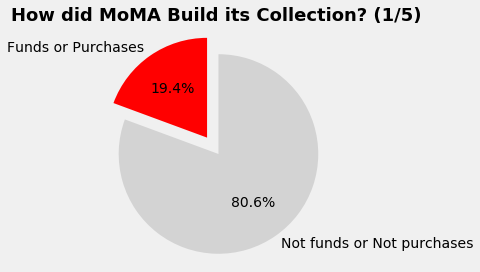

In [1742]:
# Pie chart

labels = ['Funds or Purchases', 'Not funds or Not purchases']
sizes = [19.37, 80.63]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0)

#add colors
colors = ['red','lightgrey']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)

# set title and subtitle
plt.title("How did MoMA Build its Collection? (1/5)", fontweight='bold', fontsize='18')
#plt.title("Percentage by funds or purchases", fontsize='12')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

ValueError: Unrecognized string  to axis; try on or off

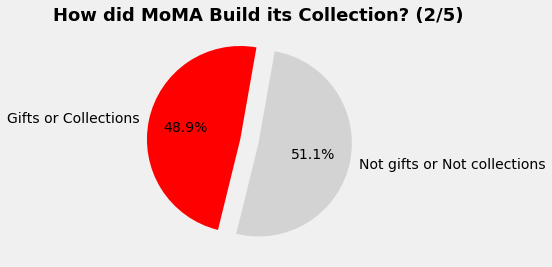

In [1743]:
# Pie chart 2

labels = ['Gifts or Collections', 'Not gifts or Not collections']
sizes = [48.94, 51.06]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0)

#add colors
colors = ['red','lightgrey']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=80)

# set title and subtitle
plt.title("How did MoMA Build its Collection? (2/5)", fontweight='bold', fontsize='18')
#plt.title("Percentage by funds or purchases", fontsize='12')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('')
plt.tight_layout()
plt.show()

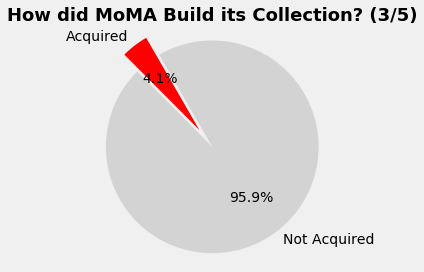

In [1748]:
# Pie chart 3

labels = ['Acquired', 'Not Acquired']
sizes = [4.13, 95.87]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0)

#add colors
colors = ['red','lightgrey']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=120)

# set title and subtitle
plt.title("How did MoMA Build its Collection? (3/5)", fontweight='bold', fontsize='18')
#plt.title("Percentage by funds or purchases", fontsize='12')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

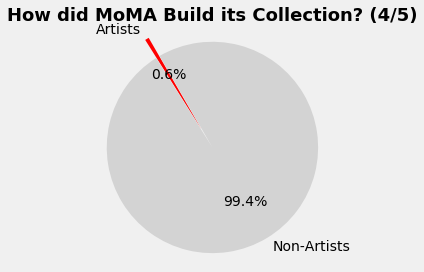

In [1749]:
# Pie chart 3

labels = ['Artists', 'Non-Artists']
sizes = [0.61, 99.39]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0)

#add colors
colors = ['red','lightgrey']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=120)

# set title and subtitle
plt.title("How did MoMA Build its Collection? (4/5)", fontweight='bold', fontsize='18')
#plt.title("Percentage by funds or purchases", fontsize='12')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

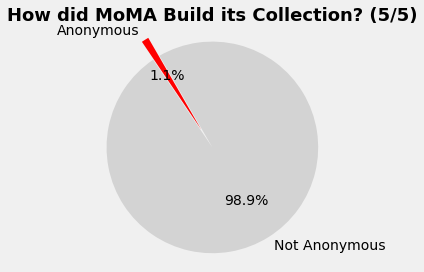

In [1750]:
# Pie chart 3

labels = ['Anonymous', 'Not Anonymous']
sizes = [1.12, 98.38]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2, 0)

#add colors
colors = ['red','lightgrey']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=120)

# set title and subtitle
plt.title("How did MoMA Build its Collection? (5/5)", fontweight='bold', fontsize='18')
#plt.title("Percentage by funds or purchases", fontsize='12')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

# Popularity of Artists by Artworks

In [1346]:
# Artist
# How many artists have more than one artwork in the collection? 
# Artwork_Artist = master_copy.groupby('UniqueID').size().sort_values(ascending=False)
Artwork_Artist['SumArtwork_Artist'] = master_copy.groupby('UniqueID').size().sort_values(ascending=False)
Artwork_Artist['SumArtwork_Artist']

UniqueID
229      4550
710      3089
7166     1892
1633     1341
2002     1291
         ... 
43061       1
4307        1
43077       1
43078       1
40905       1
Length: 10139, dtype: int64

In [1347]:
#master_copy = pd.merge(master_copy, Artwork_Artist['SumArtwork_Artist'], on='UniqueID', how='outer')

#master_copy

In [613]:
Percentage_Artists_More1 = str((5359/10149)*100)
Percentage_Artists_1 = str(100-((5359/10149)*100))

print('Percentage of Artists with More than One Artwork in MoMAs Collection :' + (Percentage_Artists_More1))
print('Percentage of Artists with One Artwork in MoMAs Collection :' + (Percentage_Artists_1))

Percentage of Artists with More than One Artwork in MoMAs Collection :52.80323184550202
Percentage of Artists with One Artwork in MoMAs Collection :47.19676815449798


In [614]:
# create an individual frame for each artist
#master_copy.loc[master_copy['UniqueID'] == '229' or '710' or '7166' or '1633' or '2002' or '1055' or '3832' or '8595' or '665' or '6459' or '8059' or '511' or '3528' or '3697' or '1500' or '1646' or '5145' or '23390' or '4609' or '1492')]

Eugene_Atget = master_copy.loc[master_copy['UniqueID'] == '229']
Louise_Bourgeois = master_copy.loc[master_copy['UniqueID'] == '710']
LudwigMies_vanderRohe = master_copy.loc[master_copy['UniqueID'] == '7166']
Jean_Dubuffet = master_copy.loc[master_copy['UniqueID'] == '1633']
Lee_Friedlander = master_copy.loc[master_copy['UniqueID'] == '2002']
Marc_Chagall = master_copy.loc[master_copy['UniqueID'] == '1055']
Henri_Matisse = master_copy.loc[master_copy['UniqueID'] == '3832']
Unknown_photographer = master_copy.loc[master_copy['UniqueID'] == '8595']
Pierre_Bonnard = master_copy.loc[master_copy['UniqueID'] == '665']
Frank_LloydWright = master_copy.loc[master_copy['UniqueID'] == '6459']

In [1348]:
# join together all artists stacked on top of each other
Top10Artist_Frames = [Eugene_Atget, Louise_Bourgeois, LudwigMies_vanderRohe, Jean_Dubuffet, Lee_Friedlander, Marc_Chagall, Henri_Matisse, Unknown_photographer, Pierre_Bonnard, Frank_LloydWright]
Top10Artist_Master = pd.concat(Top10Artist_Frames)


#sample
#frames = [df1, df2, df3]
#result = pd.concat(frames)

In [616]:
# Gender cleanup
Top10Artist_Master['Gender'].replace('male', 'Male', inplace=True)
Top10Artist_Master['Gender'].replace('female', 'Female', inplace=True)
# Gender filtered Dataframes
female = Top10Artist_Master[(Top10Artist_Master['Gender'] == 'Female')]
male = Top10Artist_Master[(Top10Artist_Master['Gender'] == 'Male')]

In [617]:
# combine the 'Architecture & Design - Image Archive' and Architecture & Design
Top10Artist_Master['Department'].replace('Architecture & Design - Image Archive', 'Architecture & Design', inplace=True)
Top10Artist_Master['Department'].value_counts(dropna=False).head(500)

Drawings & Prints        7204
Photography              6688
Architecture & Design    2724
Painting & Sculpture       26
Name: Department, dtype: int64

In [618]:
Top10Artist_Master['Date'] = Top10Artist_Master.apply(lambda row: split_dates(row), axis=1)
Top10Artist_Master['Date'] = Top10Artist_Master['Date'].astype(float).dropna()
Top10Artist_Master['DateAcquired_Year'] = Top10Artist_Master['DateAcquired_Year'].astype(float).dropna()
Top10Artist_Master['DateAcquired_Month'] = Top10Artist_Master['DateAcquired_Month'].astype(float).dropna()

Top10Artist_Master['Birth'] = Top10Artist_Master['Birth'].astype(float).dropna()
Top10Artist_Master['Death'] = Top10Artist_Master['Death'].astype(float).dropna()


Top10Artist_Master['Date'].value_counts()

1902.0    327
1900.0    315
1999.0    296
1901.0    273
1995.0    269
         ... 
1850.0      1
1891.0      1
1863.0      1
1859.0      1
1866.0      1
Name: Date, Length: 133, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text yticklabel objects>)

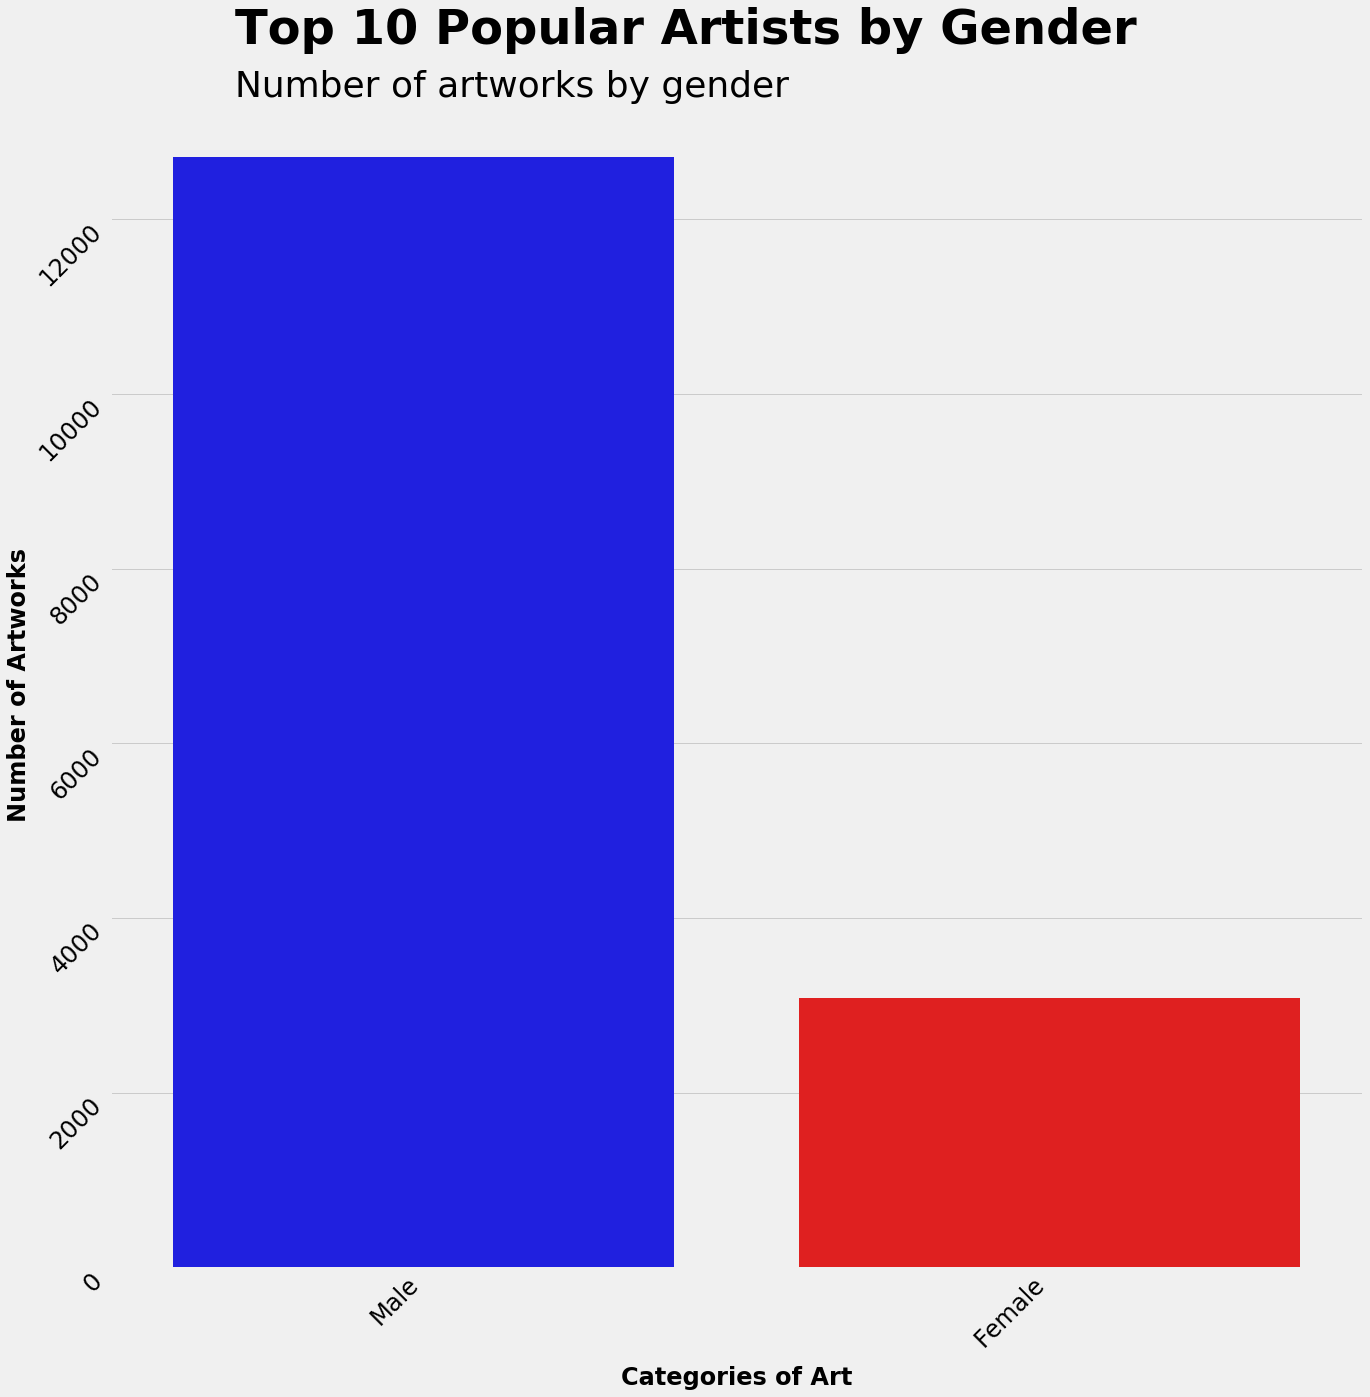

In [619]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_top10_gender = sns.countplot(
    data=Top10Artist_Master,
    palette=["blue","red"],
    x='Gender',
)

# set title and subtitle
chart_top10_gender.text(x=-0.3, y=14000, s="Top 10 Popular Artists by Gender", fontweight='bold', fontsize='48')
chart_top10_gender.text(x=-0.3, y=13400, s="Number of artworks by gender", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Categories of Art', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text yticklabel objects>)

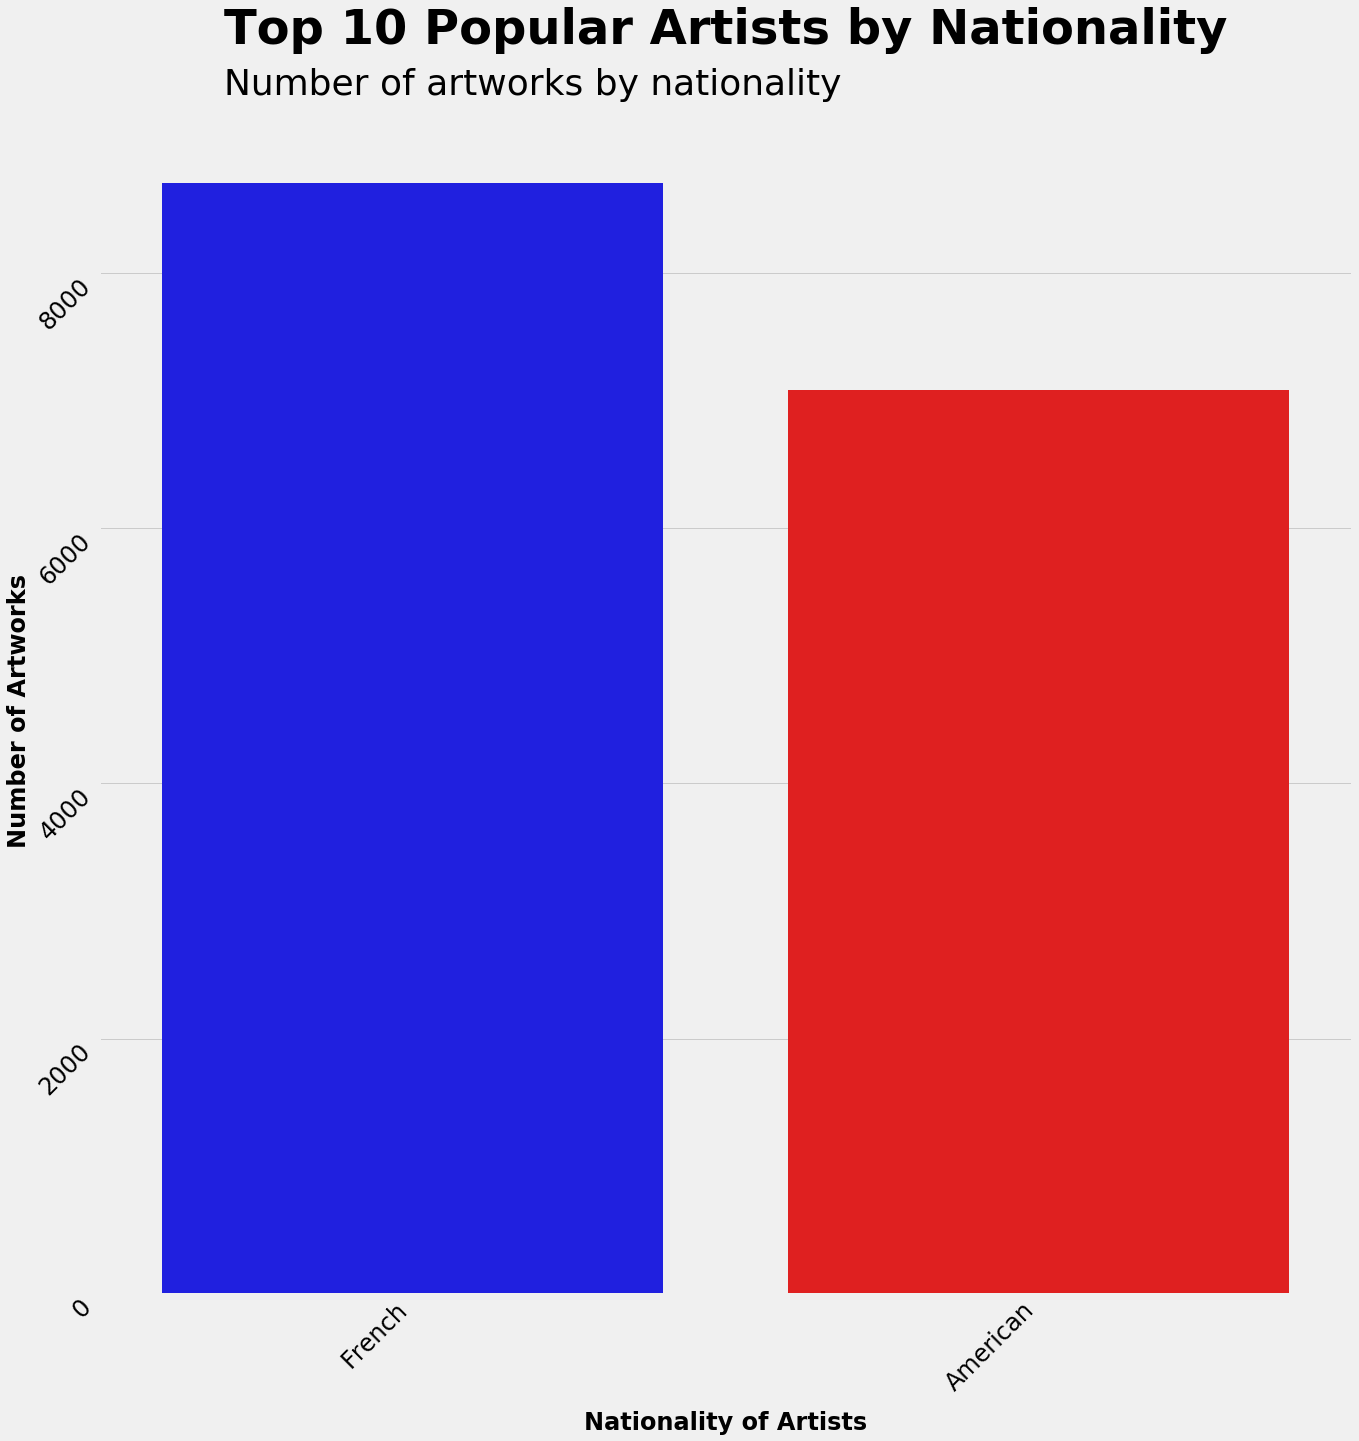

In [620]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_top10_nationality = sns.countplot(
    data=Top10Artist_Master,
    palette=["blue","red"],
    x='Nationality',
)

# set title and subtitle
chart_top10_nationality.text(x=-0.3, y=9800, s="Top 10 Popular Artists by Nationality", fontweight='bold', fontsize='48')
chart_top10_nationality.text(x=-0.3, y=9400, s="Number of artworks by nationality", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Nationality of Artists', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

# Age

## Age of artist when work created (count each) 

In [979]:
# ensure data type is float
master_copy['Date'] = master_copy['Date'].astype(float)
master_copy['Birth'] = master_copy['Birth'].astype(float)

# subtract between two floats
master_copy['CreatedAge_Artist'] = master_copy['Date'] - master_copy['Birth']

In [980]:
# delete rows with negative numbers, birth had some 4-5K zero values

master_copy['CreatedAge_Artist'] = master_copy['CreatedAge_Artist'].astype(str)
master_copy = master_copy[~master_copy['CreatedAge_Artist'].str.contains("-").fillna(False)]

In [981]:
# convert back to float
master_copy['CreatedAge_Artist'] = master_copy['CreatedAge_Artist'].dropna()
master_copy['CreatedAge_Artist'] = master_copy['CreatedAge_Artist'].astype(float)
master_copy['CreatedAge_Artist'].value_counts(dropna=False).head(1000)

NaN       18649
33.0       3052
37.0       2781
36.0       2741
30.0       2696
          ...  
1854.0        1
115.0         1
1850.0        1
135.0         1
1891.0        1
Name: CreatedAge_Artist, Length: 259, dtype: int64

In [982]:
master_copy['CreatedAge_Artist'].describe()

count    87316.000000
mean       117.213260
std        364.035878
min          0.000000
25%         34.000000
50%         43.000000
75%         55.000000
max       2015.000000
Name: CreatedAge_Artist, dtype: float64

In [983]:
def drop_values(row):
    # start date contains the current value for the Date column
    start_value = row['CreatedAge_Artist']
    
    # if larger than 4 digits, then drop above four digits
    # if less than 4 digits, then keep the 4 digit format
    # anything else, keep the same 4 digit format
    
    if start_value >= 205:
        final_value = np.NaN
    elif start_value <= -205:
        final_value = np.NaN
    else:
        final_value = start_value
    
    return final_value

In [984]:
# assign the results of " drop_value" to the columns on created age artist, acquired age artist, acquired age artwork, good life
# for Pandas to go row-wise so we set "axis = 1"
# for Pandas to go column-wise so we set "axis = 0"
master_copy['CreatedAge_Artist_2'] = master_copy.apply(lambda row: drop_values(row), axis=1)
master_copy['CreatedAge_Artist_2'].value_counts()

33.0     3052
37.0     2781
36.0     2741
30.0     2696
35.0     2669
         ... 
108.0       2
101.0       2
100.0       1
135.0       1
115.0       1
Name: CreatedAge_Artist_2, Length: 106, dtype: int64

In [986]:
master_copy['CreatedAge_Artist_2'].describe()

count    83990.000000
mean        44.845482
std         15.346412
min          0.000000
25%         34.000000
50%         42.000000
75%         53.000000
max        135.000000
Name: CreatedAge_Artist_2, dtype: float64

In [987]:
master_copy['DateAcquired']

0        1996-04-09
1        1978-09-27
2        1978-09-27
3        2001-05-11
4        1995-01-17
            ...    
105960   2019-12-09
105961   2019-11-04
105962   2019-12-11
105963   2019-12-11
105964   2019-12-11
Name: DateAcquired, Length: 105965, dtype: datetime64[ns]

## Age of artist when work acquired

In [988]:
# ensure data type is float
master_copy['DateAcquired_Year'] = master_copy['DateAcquired_Year'].astype(float)
master_copy['Birth'] = master_copy['Birth'].astype(float)

master_copy['AcquiredAge_Artist'] = master_copy['DateAcquired_Year'] - master_copy['Birth']

In [989]:
master_copy['AcquiredAge_Artist'] = master_copy['AcquiredAge_Artist'].astype(str)
master_copy = master_copy[~master_copy['AcquiredAge_Artist'].str.contains("-").fillna(False)]

In [990]:
master_copy['AcquiredAge_Artist'] = master_copy['AcquiredAge_Artist'].dropna()
master_copy['AcquiredAge_Artist'] = master_copy['AcquiredAge_Artist'].astype(float)
master_copy['AcquiredAge_Artist'].value_counts(dropna=False).head(1000)

NaN      4839
111.0    4645
66.0     2193
77.0     2078
97.0     2051
         ... 
194.0       1
210.0       1
2.0         1
208.0       1
197.0       1
Name: AcquiredAge_Artist, Length: 284, dtype: int64

In [991]:
def drop_age_values(row):
    # start date contains the current value for the Date column
    start_value = row['AcquiredAge_Artist']
    
    # if larger than 4 digits, then drop above four digits
    # if less than 4 digits, then keep the 4 digit format
    # anything else, keep the same 4 digit format
    
    if start_value >= 205:
        final_value = np.NaN
    elif start_value <= -205:
        final_value = np.NaN
    else:
        final_value = start_value
    
    return final_value

In [992]:
master_copy['AcquiredAge_Artist_2'] = master_copy.apply(lambda row: drop_age_values(row), axis=1)
master_copy['AcquiredAge_Artist_2'].value_counts()

111.0    4645
66.0     2193
77.0     2078
97.0     2051
51.0     1891
         ... 
5.0         1
2.0         1
187.0       1
194.0       1
197.0       1
Name: AcquiredAge_Artist_2, Length: 191, dtype: int64

In [993]:
master_copy['AcquiredAge_Artist_2'].describe()

count    96191.000000
mean        69.408448
std         27.581663
min          1.000000
25%         47.000000
50%         66.000000
75%         87.000000
max        203.000000
Name: AcquiredAge_Artist_2, dtype: float64

## Age of artwork between when work is created and acquired

In [994]:
master_copy['AcquiredAge_Artwork'] = master_copy['DateAcquired_Year'] - master_copy['Date']

In [995]:
master_copy['AcquiredAge_Artwork'] = master_copy['AcquiredAge_Artwork'].astype(str)
master_copy = master_copy[~master_copy['AcquiredAge_Artwork'].str.contains("-").fillna(False)]

In [996]:
master_copy['AcquiredAge_Artwork'] = master_copy['AcquiredAge_Artwork'].astype(float)
master_copy['AcquiredAge_Artwork'].value_counts(dropna=False).head(1000)

NaN      22342
1.0      10888
0.0       5423
2.0       5337
3.0       3591
         ...  
148.0        1
153.0        1
133.0        1
152.0        1
177.0        1
Name: AcquiredAge_Artwork, Length: 165, dtype: int64

In [997]:
master_copy['AcquiredAge_Artwork'].describe()

count    83623.000000
mean        24.505304
std         27.355531
min          0.000000
25%          2.000000
50%         14.000000
75%         40.000000
max        186.000000
Name: AcquiredAge_Artwork, dtype: float64

In [998]:
def drop_acquired_values(row):
    # start date contains the current value for the Date column
    start_value = row['AcquiredAge_Artwork']
    
    # if larger than 4 digits, then drop above four digits
    # if less than 4 digits, then keep the 4 digit format
    # anything else, keep the same 4 digit format
    
    if start_value >= 205:
        final_value = np.NaN
    elif start_value <= -205:
        final_value = np.NaN
    else:
        final_value = start_value
    
    return final_value

In [999]:
master_copy['AcquiredAge_Artwork_2'] = master_copy.apply(lambda row: drop_acquired_values(row), axis=1)
master_copy['AcquiredAge_Artwork_2'].value_counts()

1.0      10888
0.0       5423
2.0       5337
3.0       3591
4.0       2557
         ...  
133.0        1
120.0        1
152.0        1
177.0        1
175.0        1
Name: AcquiredAge_Artwork_2, Length: 164, dtype: int64

In [1000]:
master_copy['AcquiredAge_Artwork_2'].describe()

count    83623.000000
mean        24.505304
std         27.355531
min          0.000000
25%          2.000000
50%         14.000000
75%         40.000000
max        186.000000
Name: AcquiredAge_Artwork_2, dtype: float64

## Group into bins

In [1001]:
created_age_artist_bins = pd.cut(master_copy['CreatedAge_Artist_2'], 10)

#labels = ["0%","25%","50%","75%"])

acquired_age_artist_bins = pd.cut(master_copy['AcquiredAge_Artist_2'], 10)
acquired_age_artwork_bins = pd.cut(master_copy['AcquiredAge_Artwork_2'], 10)

In [790]:
master_copy

UniqueID                                              Title  \
0          6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1          6210                                           Armchair   
2          6210                                              Stool   
3          6210                                            Railing   
4          7470  City of Music, National Superior Conservatory ...   
...         ...                                                ...   
139006    69941                Untitled (First White Light Series)   
139013   131890                            Anatomy of an AI System   
139014   132134          Full of Surprises from Pulled in Brooklyn   
139015   132135               Pink Figures from Pulled in Brooklyn   
139016   131931                                    Dyslympics 2680   

                          Artist  Gender Nationality   Birth   Death    Date  \
0                    Otto Wagner    Male    Austrian  1841.0  1918.0  1896.0   
1                    Otto Wagner    Male    Austrian  1841.0  1918.0  1902.0   
2                    Otto Wagner    Male    Austrian  1841.0  1918.0  1904.0   
3                    Otto Wagner    Male    Austrian  1841.0  1918.0  1899.0   
4       Christian de Portzamparc    Male      French  1944.0     0.0  1987.0   
...                          ...     ...         ...     ...     ...     ...   
139006                Mary Corse  Female    American  1945.0     0.0  1968.0   
139013             Kate Crawford  Female  Australian  1976.0     0.0  2018.0   
139014          Sheryl Oppenheim  Female    American  1983.0     0.0  2019.0   
139015           Ruby Sky Stiler  Female    American  1979.0     0.0  2019.0   
139016            Sachiko Kazama  Female    Japanese  1972.0     0.0  2018.0   

                                               Medium  \
0       Ink and cut-and-pasted painted pages on paper   
1                             Beech wood and aluminum   
2       Bent beech wood, molded plywood, and aluminum   
3                                   Painted cast-iron   
4                   Paint and colored pencil on print   
...                                               ...   
139006       Glass microspheres and acrylic on canvas   
139013               digital image file and newsprint   
139014     One from a portfolio with six screenprints   
139015     One from a portfolio with six screenprints   
139016                                        Woodcut   

                                               Dimensions  ... Nationality_Am  \
0                      19 1/8 x 66 1/2" (48.6 x 168.9 cm)  ...  International   
1       30 7/8 x 22 1/4 x 20 1/4" (78.5 x 56.5 x 51.5 ...  ...  International   
2                 18 1/2 x 16 x 16" (47 x 40.6 x 40.6 cm)  ...  International   
3            28 1/4 x 46 1/2 x 3" (72.4 x 117.5 x 7.6 cm)  ...  International   
4                           16 x 11 3/4" (40.6 x 29.8 cm)  ...  International   
...                                                   ...  ...            ...   
139006                        78 × 78" (198.1 × 198.1 cm)  ...       American   
139013                                                NaN  ...  International   
139014  composition and sheet: 30 × 22 1/16" (76.2 × 5...  ...       American   
139015  composition (irreg.): 18 3/4 × 16 9/16" (47.7 ...  ...       American   
139016                       95 × 251" (241.3 × 637.5 cm)  ...  International   

       CreditLine_Fund CreditLine_Gift CreditLine_Anonymous CreatedAge_Artist  \
0                False           False                False              55.0   
1                 True           False                False              61.0   
2                 True           False                False              63.0   
3                 True           False                False              58.0   
4                False            True                False              43.0   
...                ...             ...                  ...  

# Age: First Piece of Work Only Per Artist (_2)

## CreatedAge_Artist_2 

In [1099]:
group = master_copy.groupby('Artist')

In [1003]:
master_copy_1 = group.apply(lambda x: x['CreatedAge_Artist_2'].unique())

In [1004]:
master_copy_1 = master_copy_1.apply(pd.Series)

In [1005]:
minValues_CreatedAge_Artist_2 = master_copy_1.min(axis=1)
 
print('minimum value in each row : ')
print(minValues_CreatedAge_Artist_2)

minimum value in each row : 
Artist
A. Becker               NaN
A. E. Gallatin         52.0
A. F. Gangkofner       35.0
A. G. Fronzoni         41.0
A. Gisiger              NaN
                       ... 
Étienne Carjat         33.0
Étienne Hajdu          46.0
Étienne-Jules Marey     NaN
Öyvind Fahlström       34.0
Øistein Thurman         NaN
Length: 10113, dtype: float64


In [1006]:
master_copy_1['minValues_CreatedAge_Artist_2']=minValues_CreatedAge_Artist_2

In [1007]:
master_copy_1['minValues_CreatedAge_Artist_2'].describe()

count    8469.000000
mean       35.517180
std        11.101981
min         0.000000
25%        28.000000
50%        34.000000
75%        41.000000
max       135.000000
Name: minValues_CreatedAge_Artist_2, dtype: float64

In [1008]:
master_copy_1.head()

0     1     2     3     4     5     6     7     8     9  \
Artist                                                                         
A. Becker          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. E. Gallatin    52.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. F. Gangkofner  35.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. G. Fronzoni    44.0  46.0  43.0  56.0  57.0  58.0  48.0  53.0  51.0  41.0   
A. Gisiger         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  ...  56  57  58  59  60  61  62  63  64  \
Artist            ...                                       
A. Becker         ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. E. Gallatin    ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. F. Gangkofner  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. G. Fronzoni    ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. Gisiger        ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                  minValues_CreatedAge_Artist_2  
Artist                                           
A. Becker                                   NaN  
A. E. Gallatin                             52.0  
A. F. Gangkofner                           35.0  
A. G. Fronzoni                             41.0  
A. Gisiger                                  NaN  

[5 rows x 66 columns]

In [1009]:
master_copy = master_copy.merge(master_copy_1, left_on='Artist', right_on='Artist', how='inner')

## AcquiredAge_Artist_2

In [1010]:
master_copy_2 = group.apply(lambda x: x['AcquiredAge_Artist_2'].unique())

In [1011]:
master_copy_2 = master_copy_2.apply(pd.Series)

In [1012]:
minValues_AcquiredAge_Artist_2 = master_copy_2.min(axis=1)
 
print('minimum value in each row : ')
print(minValues_AcquiredAge_Artist_2)

minimum value in each row : 
Artist
A. Becker                NaN
A. E. Gallatin         111.0
A. F. Gangkofner        37.0
A. G. Fronzoni          46.0
A. Gisiger               NaN
                       ...  
Étienne Carjat         135.0
Étienne Hajdu           48.0
Étienne-Jules Marey    163.0
Öyvind Fahlström        36.0
Øistein Thurman          NaN
Length: 10113, dtype: float64


In [1013]:
master_copy_2['minValues_AcquiredAge_Artist_2']=minValues_AcquiredAge_Artist_2

In [1014]:
master_copy_2['minValues_AcquiredAge_Artist_2'].describe()

count    8794.000000
mean       53.542984
std        26.809762
min         1.000000
25%        35.000000
50%        44.000000
75%        64.000000
max       198.000000
Name: minValues_AcquiredAge_Artist_2, dtype: float64

In [1015]:
master_copy_2.head()

0     1     2     3     4   5   6   7   8   9  ...  50  \
Artist                                                               ...       
A. Becker           NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN  ... NaN   
A. E. Gallatin    111.0   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN  ... NaN   
A. F. Gangkofner   37.0  80.0   NaN   NaN   NaN NaN NaN NaN NaN NaN  ... NaN   
A. G. Fronzoni     46.0  71.0  77.0  80.0  87.0 NaN NaN NaN NaN NaN  ... NaN   
A. Gisiger          NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN  ... NaN   

                  51  52  53  54  55  56  57  58  \
Artist                                             
A. Becker        NaN NaN NaN NaN NaN NaN NaN NaN   
A. E. Gallatin   NaN NaN NaN NaN NaN NaN NaN NaN   
A. F. Gangkofner NaN NaN NaN NaN NaN NaN NaN NaN   
A. G. Fronzoni   NaN NaN NaN NaN NaN NaN NaN NaN   
A. Gisiger       NaN NaN NaN NaN NaN NaN NaN NaN   

                  minValues_AcquiredAge_Artist_2  
Artist                                            
A. Becker                                    NaN  
A. E. Gallatin                             111.0  
A. F. Gangkofner                            37.0  
A. G. Fronzoni                              46.0  
A. Gisiger                                   NaN  

[5 rows x 60 columns]

In [1016]:
master_copy.merge(master_copy_2, left_on='Artist', right_on='Artist', how='inner')

UniqueID                                              Title  \
0          6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1          6210                                           Armchair   
2          6210                                              Stool   
3          6210                                            Railing   
4          7470  City of Music, National Superior Conservatory ...   
...         ...                                                ...   
105960    69941                Untitled (First White Light Series)   
105961   131890                            Anatomy of an AI System   
105962   132134          Full of Surprises from Pulled in Brooklyn   
105963   132135               Pink Figures from Pulled in Brooklyn   
105964   131931                                    Dyslympics 2680   

                          Artist  Gender Nationality   Birth   Death    Date  \
0                    Otto Wagner    Male    Austrian  1841.0  1918.0  1896.0   
1                    Otto Wagner    Male    Austrian  1841.0  1918.0  1902.0   
2                    Otto Wagner    Male    Austrian  1841.0  1918.0  1904.0   
3                    Otto Wagner    Male    Austrian  1841.0  1918.0  1899.0   
4       Christian de Portzamparc    Male      French  1944.0     0.0  1987.0   
...                          ...     ...         ...     ...     ...     ...   
105960                Mary Corse  Female    American  1945.0     0.0  1968.0   
105961             Kate Crawford  Female  Australian  1976.0     0.0  2018.0   
105962          Sheryl Oppenheim  Female    American  1983.0     0.0  2019.0   
105963           Ruby Sky Stiler  Female    American  1979.0     0.0  2019.0   
105964            Sachiko Kazama  Female    Japanese  1972.0     0.0  2018.0   

                                               Medium  \
0       Ink and cut-and-pasted painted pages on paper   
1                             Beech wood and aluminum   
2       Bent beech wood, molded plywood, and aluminum   
3                                   Painted cast-iron   
4                   Paint and colored pencil on print   
...                                               ...   
105960       Glass microspheres and acrylic on canvas   
105961               digital image file and newsprint   
105962     One from a portfolio with six screenprints   
105963     One from a portfolio with six screenprints   
105964                                        Woodcut   

                                               Dimensions  ... 50_y 51_y 52_y  \
0                      19 1/8 x 66 1/2" (48.6 x 168.9 cm)  ...  NaN  NaN  NaN   
1       30 7/8 x 22 1/4 x 20 1/4" (78.5 x 56.5 x 51.5 ...  ...  NaN  NaN  NaN   
2                 18 1/2 x 16 x 16" (47 x 40.6 x 40.6 cm)  ...  NaN  NaN  NaN   
3            28 1/4 x 46 1/2 x 3" (72.4 x 117.5 x 7.6 cm)  ...  NaN  NaN  NaN   
4                           16 x 11 3/4" (40.6 x 29.8 cm)  ...  NaN  NaN  NaN   
...                                                   ...  ...  ...  ...  ...   
105960                        78 × 78" (198.1 × 198.1 cm)  ...  NaN  NaN  NaN   
105961                                                NaN  ...  NaN  NaN  NaN   
105962  composition and sheet: 30 × 22 1/16" (76.2 × 5...  ...  NaN  NaN  NaN   
105963  composition (irreg.): 18 3/4 × 16 9/16" (47.7 ...  ...  NaN  NaN  NaN   
105964                       95 × 251" (241.3 × 637.5 cm)  ...  NaN  NaN  NaN   

       53_y 54_y 55_y  56_y 57_y 58_y  minValues_AcquiredAge_Artist_2  
0       NaN  NaN  NaN   NaN  NaN  NaN                           137.0  
1       NaN  NaN  NaN   NaN  NaN  NaN                           137.0  
2       NaN  NaN  NaN   NaN  NaN  NaN                           137.0  
3       NaN  NaN  NaN   NaN  NaN  NaN                           137.0  
4       NaN  NaN  NaN   NaN  NaN  NaN                            51.0  
...     ...  ...  ...   ...  ...  ...                             ...  
105960  NaN  NaN  NaN   NaN  NaN  NaN      

In [1017]:
master_copy = master_copy.merge(master_copy_2, left_on='Artist', right_on='Artist', how='inner')

## AcquiredAge_Artwork_2

In [1018]:
master_copy_3 = group.apply(lambda x: x['AcquiredAge_Artwork_2'].unique())

In [1019]:
master_copy_3 = master_copy_3.apply(pd.Series)

In [1020]:
minValues_AcquiredAge_Artwork_2 = master_copy_3.min(axis=1)
 
print('minimum value in each row : ')
print(minValues_AcquiredAge_Artwork_2)

minimum value in each row : 
Artist
A. Becker               10.0
A. E. Gallatin          59.0
A. F. Gangkofner         2.0
A. G. Fronzoni           0.0
A. Gisiger               0.0
                       ...  
Étienne Carjat         102.0
Étienne Hajdu            0.0
Étienne-Jules Marey      NaN
Öyvind Fahlström         0.0
Øistein Thurman          1.0
Length: 10113, dtype: float64


In [1021]:
master_copy_3['minValues_AcquiredAge_Artwork_2']=minValues_AcquiredAge_Artwork_2

In [1022]:
master_copy_3['minValues_AcquiredAge_Artwork_2'].describe()

count    9508.000000
mean       16.437421
std        26.042702
min         0.000000
25%         1.000000
50%         3.000000
75%        24.000000
max       186.000000
Name: minValues_AcquiredAge_Artwork_2, dtype: float64

In [1023]:
master_copy_3.head()

0     1    2     3     4     5     6     7     8     9  \
Artist                                                                        
A. Becker         10.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. E. Gallatin    59.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. F. Gangkofner   2.0  45.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. G. Fronzoni     2.0   0.0  3.0  15.0  14.0  13.0  31.0  34.0  32.0  27.0   
A. Gisiger         0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  ...  66  67  68  69  70  71  72  73  74  \
Artist            ...                                       
A. Becker         ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. E. Gallatin    ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. F. Gangkofner  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. G. Fronzoni    ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
A. Gisiger        ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                  minValues_AcquiredAge_Artwork_2  
Artist                                             
A. Becker                                    10.0  
A. E. Gallatin                               59.0  
A. F. Gangkofner                              2.0  
A. G. Fronzoni                                0.0  
A. Gisiger                                    0.0  

[5 rows x 76 columns]

In [1024]:
master_copy.merge(master_copy_3, left_on='Artist', right_on='Artist', how='inner')

UniqueID                                              Title  \
0          6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1          6210                                           Armchair   
2          6210                                              Stool   
3          6210                                            Railing   
4          7470  City of Music, National Superior Conservatory ...   
...         ...                                                ...   
105960    69941                Untitled (First White Light Series)   
105961   131890                            Anatomy of an AI System   
105962   132134          Full of Surprises from Pulled in Brooklyn   
105963   132135               Pink Figures from Pulled in Brooklyn   
105964   131931                                    Dyslympics 2680   

                          Artist  Gender Nationality   Birth   Death    Date  \
0                    Otto Wagner    Male    Austrian  1841.0  1918.0  1896.0   
1                    Otto Wagner    Male    Austrian  1841.0  1918.0  1902.0   
2                    Otto Wagner    Male    Austrian  1841.0  1918.0  1904.0   
3                    Otto Wagner    Male    Austrian  1841.0  1918.0  1899.0   
4       Christian de Portzamparc    Male      French  1944.0     0.0  1987.0   
...                          ...     ...         ...     ...     ...     ...   
105960                Mary Corse  Female    American  1945.0     0.0  1968.0   
105961             Kate Crawford  Female  Australian  1976.0     0.0  2018.0   
105962          Sheryl Oppenheim  Female    American  1983.0     0.0  2019.0   
105963           Ruby Sky Stiler  Female    American  1979.0     0.0  2019.0   
105964            Sachiko Kazama  Female    Japanese  1972.0     0.0  2018.0   

                                               Medium  \
0       Ink and cut-and-pasted painted pages on paper   
1                             Beech wood and aluminum   
2       Bent beech wood, molded plywood, and aluminum   
3                                   Painted cast-iron   
4                   Paint and colored pencil on print   
...                                               ...   
105960       Glass microspheres and acrylic on canvas   
105961               digital image file and newsprint   
105962     One from a portfolio with six screenprints   
105963     One from a portfolio with six screenprints   
105964                                        Woodcut   

                                               Dimensions  ...  66  67  68  \
0                      19 1/8 x 66 1/2" (48.6 x 168.9 cm)  ... NaN NaN NaN   
1       30 7/8 x 22 1/4 x 20 1/4" (78.5 x 56.5 x 51.5 ...  ... NaN NaN NaN   
2                 18 1/2 x 16 x 16" (47 x 40.6 x 40.6 cm)  ... NaN NaN NaN   
3            28 1/4 x 46 1/2 x 3" (72.4 x 117.5 x 7.6 cm)  ... NaN NaN NaN   
4                           16 x 11 3/4" (40.6 x 29.8 cm)  ... NaN NaN NaN   
...                                                   ...  ...  ..  ..  ..   
105960                        78 × 78" (198.1 × 198.1 cm)  ... NaN NaN NaN   
105961                                                NaN  ... NaN NaN NaN   
105962  composition and sheet: 30 × 22 1/16" (76.2 × 5...  ... NaN NaN NaN   
105963  composition (irreg.): 18 3/4 × 16 9/16" (47.7 ...  ... NaN NaN NaN   
105964                       95 × 251" (241.3 × 637.5 cm)  ... NaN NaN NaN   

        69  70  71  72  73  74  minValues_AcquiredAge_Artwork_2  
0      NaN NaN NaN NaN NaN NaN                             74.0  
1      NaN NaN NaN NaN NaN NaN                             74.0  
2      NaN NaN NaN NaN NaN NaN                             74.0  
3      NaN NaN NaN NaN NaN NaN                             74.0  
4      NaN NaN NaN NaN NaN NaN                              8.0  
...     ..  ..  ..  ..  ..  ..                              ...  
105960 NaN NaN NaN NaN NaN NaN                             51.0  
105961 NaN NaN NaN NaN NaN NaN                         

In [1025]:
master_copy = master_copy.merge(master_copy_3, left_on='Artist', right_on='Artist', how='inner')

# Cleanup master_copy columns by dropping certain column names

In [1070]:
#master_copy = master_copy.drop(master_copy.filter(regex='0').columns, axis=1)
#master_copy = master_copy.drop(['2'], axis=1)
#master_copy.rename(columns={'0':'abc', '1':'def','2': 'ghi', '3': 'jkl'}, inplace = True)
master_copy

UniqueID                                              Title  \
0          6210  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1          6210                                           Armchair   
2          6210                                              Stool   
3          6210                                            Railing   
4          7470  City of Music, National Superior Conservatory ...   
...         ...                                                ...   
105960    69941                Untitled (First White Light Series)   
105961   131890                            Anatomy of an AI System   
105962   132134          Full of Surprises from Pulled in Brooklyn   
105963   132135               Pink Figures from Pulled in Brooklyn   
105964   131931                                    Dyslympics 2680   

                          Artist  Gender Nationality   Birth   Death    Date  \
0                    Otto Wagner    Male    Austrian  1841.0  1918.0  1896.0   
1                    Otto Wagner    Male    Austrian  1841.0  1918.0  1902.0   
2                    Otto Wagner    Male    Austrian  1841.0  1918.0  1904.0   
3                    Otto Wagner    Male    Austrian  1841.0  1918.0  1899.0   
4       Christian de Portzamparc    Male      French  1944.0     0.0  1987.0   
...                          ...     ...         ...     ...     ...     ...   
105960                Mary Corse  Female    American  1945.0     0.0  1968.0   
105961             Kate Crawford  Female  Australian  1976.0     0.0  2018.0   
105962          Sheryl Oppenheim  Female    American  1983.0     0.0  2019.0   
105963           Ruby Sky Stiler  Female    American  1979.0     0.0  2019.0   
105964            Sachiko Kazama  Female    Japanese  1972.0     0.0  2018.0   

                                               Medium  \
0       Ink and cut-and-pasted painted pages on paper   
1                             Beech wood and aluminum   
2       Bent beech wood, molded plywood, and aluminum   
3                                   Painted cast-iron   
4                   Paint and colored pencil on print   
...                                               ...   
105960       Glass microspheres and acrylic on canvas   
105961               digital image file and newsprint   
105962     One from a portfolio with six screenprints   
105963     One from a portfolio with six screenprints   
105964                                        Woodcut   

                                               Dimensions  ...  \
0                      19 1/8 x 66 1/2" (48.6 x 168.9 cm)  ...   
1       30 7/8 x 22 1/4 x 20 1/4" (78.5 x 56.5 x 51.5 ...  ...   
2                 18 1/2 x 16 x 16" (47 x 40.6 x 40.6 cm)  ...   
3            28 1/4 x 46 1/2 x 3" (72.4 x 117.5 x 7.6 cm)  ...   
4                           16 x 11 3/4" (40.6 x 29.8 cm)  ...   
...                                                   ...  ...   
105960                        78 × 78" (198.1 × 198.1 cm)  ...   
105961                                                NaN  ...   
105962  composition and sheet: 30 × 22 1/16" (76.2 × 5...  ...   
105963  composition (irreg.): 18 3/4 × 16 9/16" (47.7 ...  ...   
105964                       95 × 251" (241.3 × 637.5 cm)  ...   

       CreatedAge_Artist AcquiredAge_Artist AcquiredAge_Artwork  \
0                   55.0              155.0               100.0   
1                   61.0              137.0                76.0   
2                   63.0              137.0                74.0   
3                   58.0              160.0               102.0   
4                   43.0               51.0                 8.0   
...                  ...                ...                 ...   
105960              23.0               74.0                51.0   
105961              42.0               43.0                 1.0   
105962              36.0               36.0                 0.0   
105963              40.0               40.0              

## Graphs of Age Groups

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text yticklabel objects>)

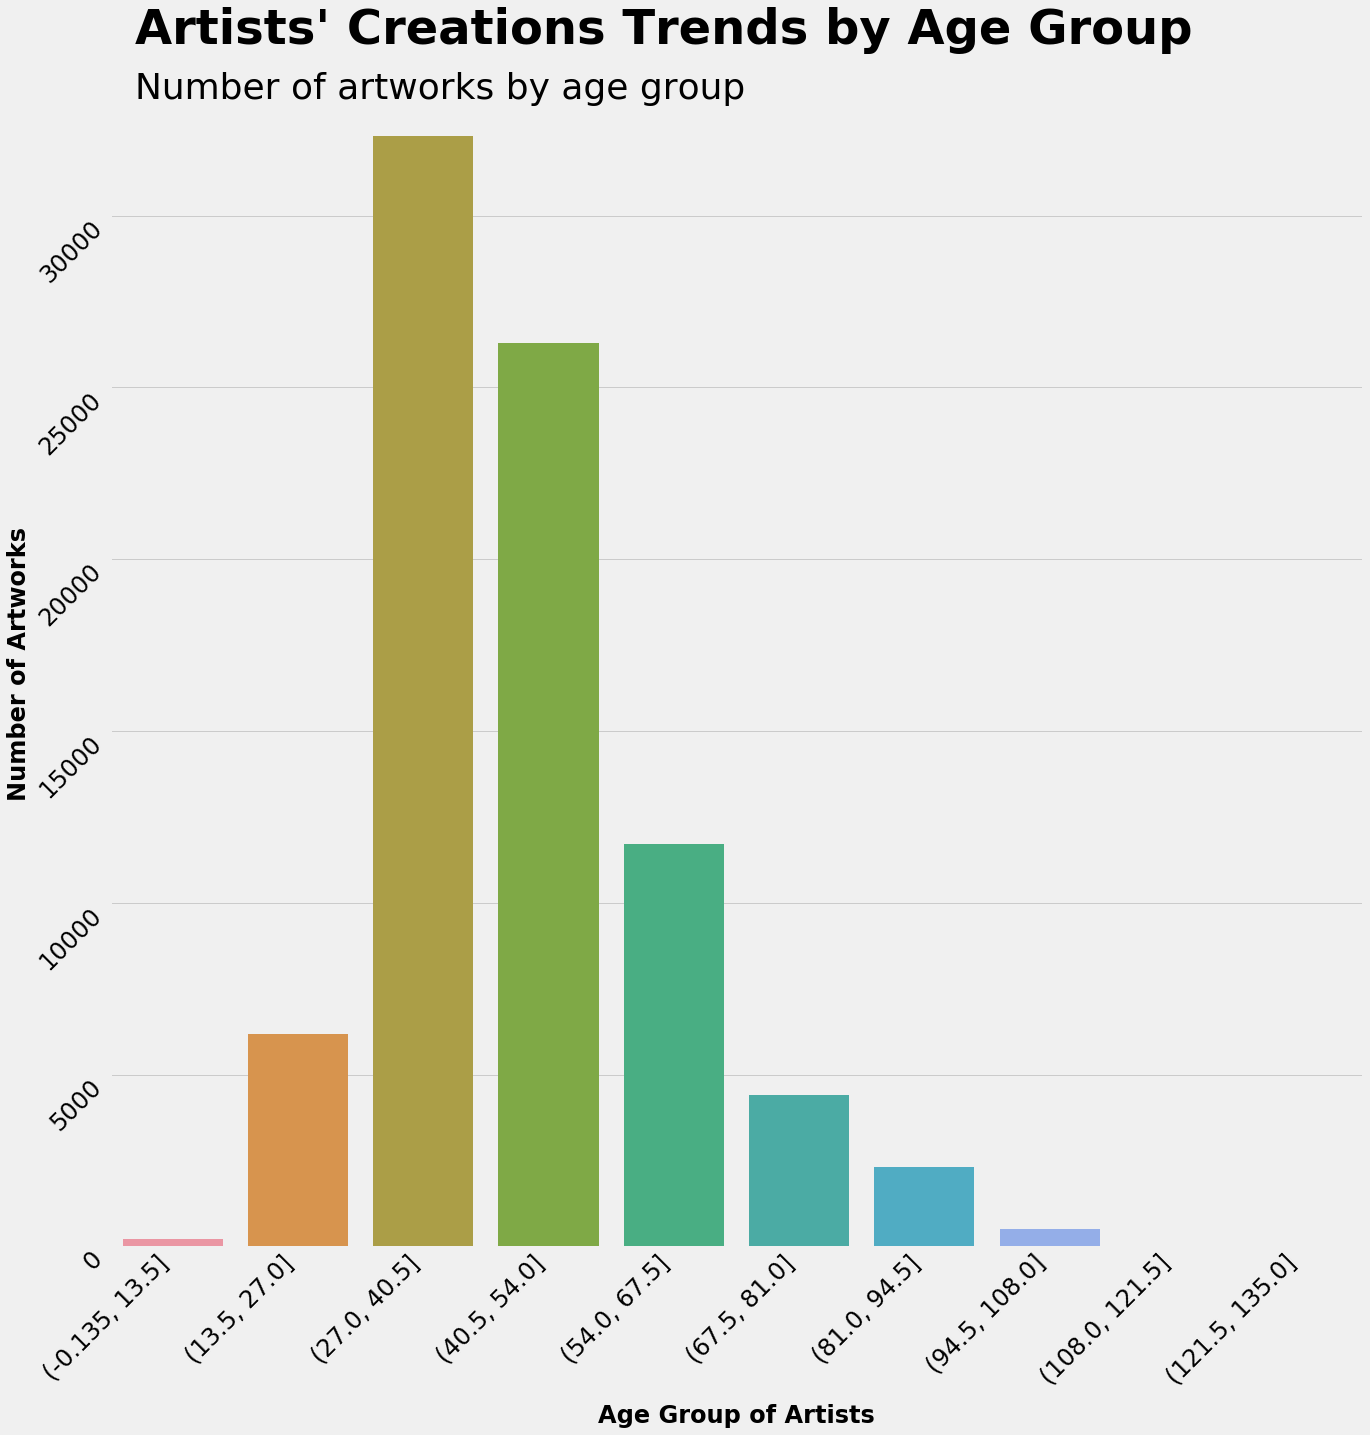

In [880]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_createdage_artist = sns.countplot(
    data=master_copy,
    x=created_age_artist_bins,
)

# set title and subtitle
chart_createdage_artist.text(x=-0.3, y=35000, s="Artists' Creations Trends by Age Group", fontweight='bold', fontsize='48')
chart_createdage_artist.text(x=-0.3, y=33400, s="Number of artworks by age group", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artists', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text yticklabel objects>)

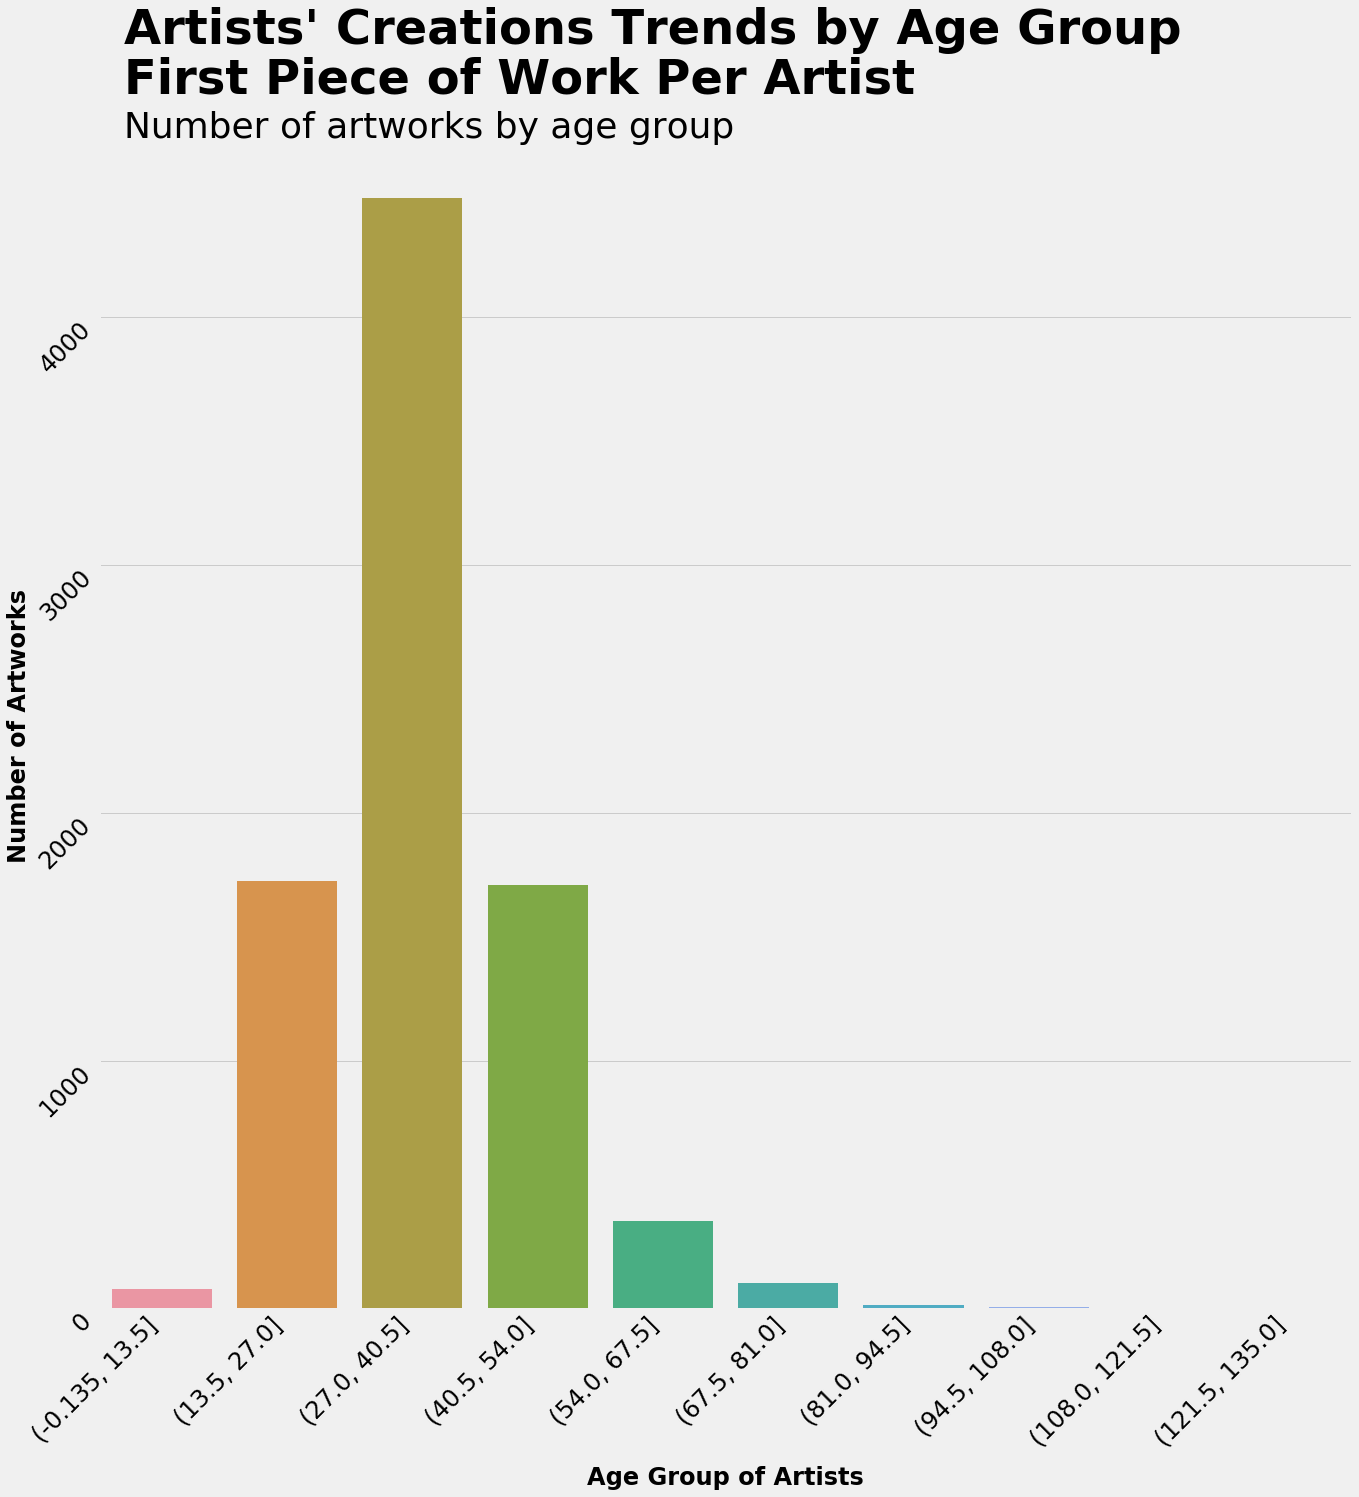

In [1079]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_createdage_artist_2 = sns.countplot(
    data=master_copy_1,
    x=created_age_artist_bins_2,
)

# set title and subtitle
chart_createdage_artist_2.text(x=-0.3, y=5100, s="Artists' Creations Trends by Age Group", fontweight='bold', fontsize='48')
chart_createdage_artist_2.text(x=-0.3, y=4900, s="First Piece of Work Per Artist", fontweight='bold', fontsize='48')
chart_createdage_artist_2.text(x=-0.3, y=4720, s="Number of artworks by age group", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artists', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

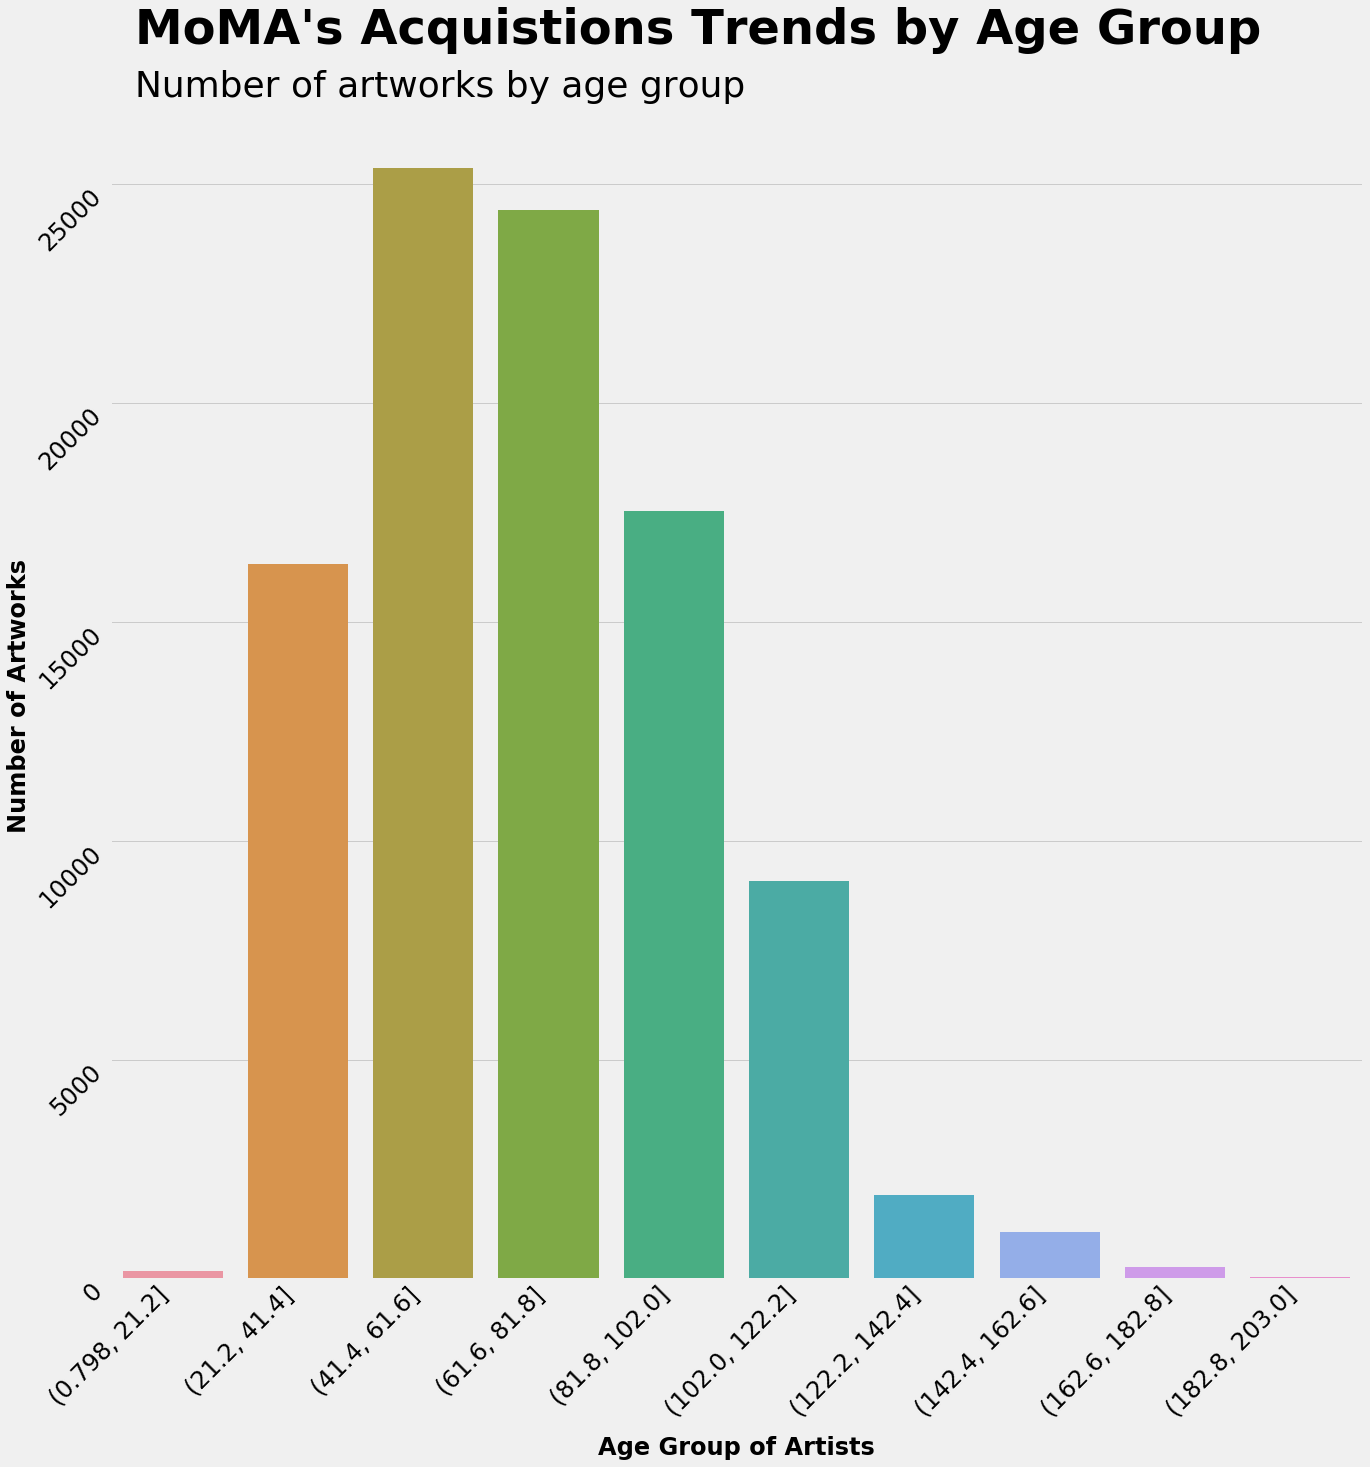

In [776]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_acquiredage_artist = sns.countplot(
    data=master_copy,
    x=acquired_age_artist_bins,
)

# set title and subtitle
chart_acquiredage_artist.text(x=-0.3, y=28200, s="MoMA's Acquistions Trends by Age Group", fontweight='bold', fontsize='48')
chart_acquiredage_artist.text(x=-0.3, y=27000, s="Number of artworks by age group", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artists', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

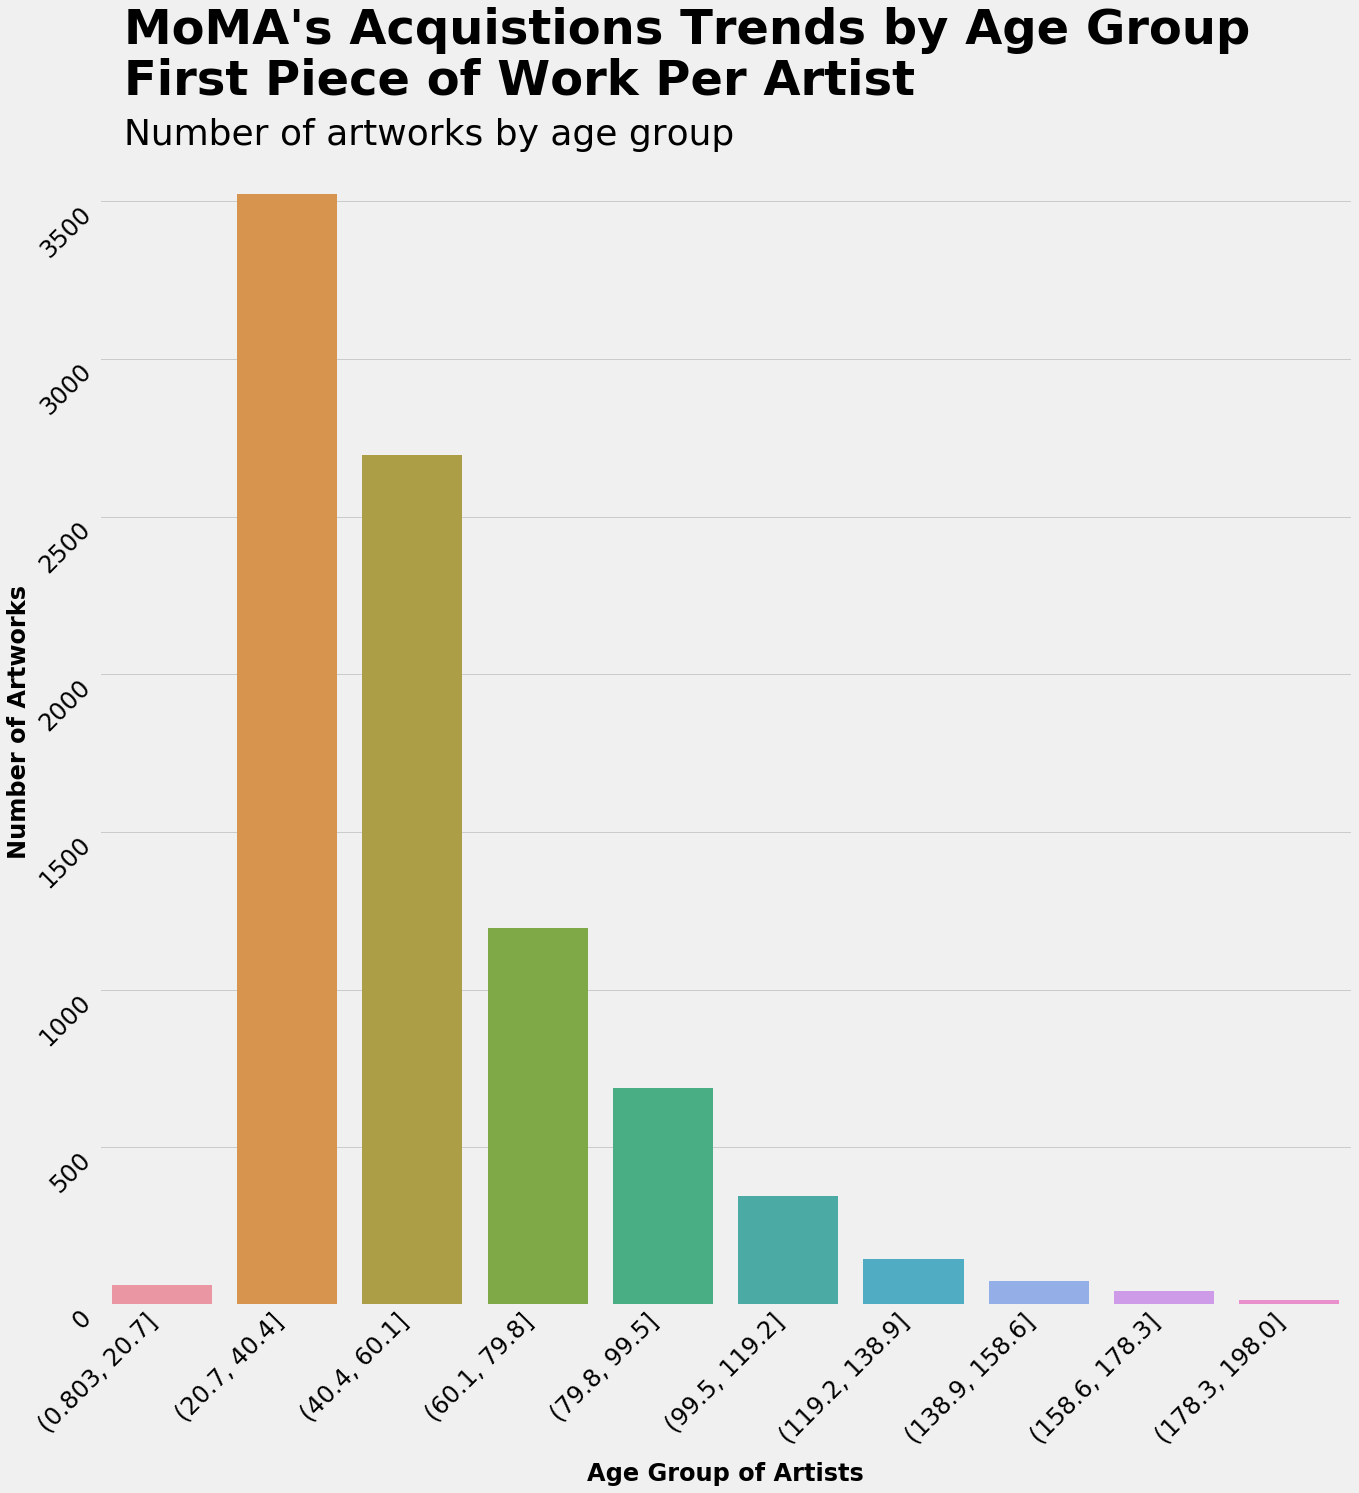

In [1072]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_acquiredage_artist_2 = sns.countplot(
    data=master_copy,
    x=acquired_age_artist_bins_2,
)

# set title and subtitle
chart_acquiredage_artist_2.text(x=-0.3, y=4000, s="MoMA's Acquistions Trends by Age Group", fontweight='bold', fontsize='48')
chart_acquiredage_artist_2.text(x=-0.3, y=3840, s="First Piece of Work Per Artist", fontweight='bold', fontsize='48')
chart_acquiredage_artist_2.text(x=-0.3, y=3680, s="Number of artworks by age group", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artists', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text yticklabel objects>)

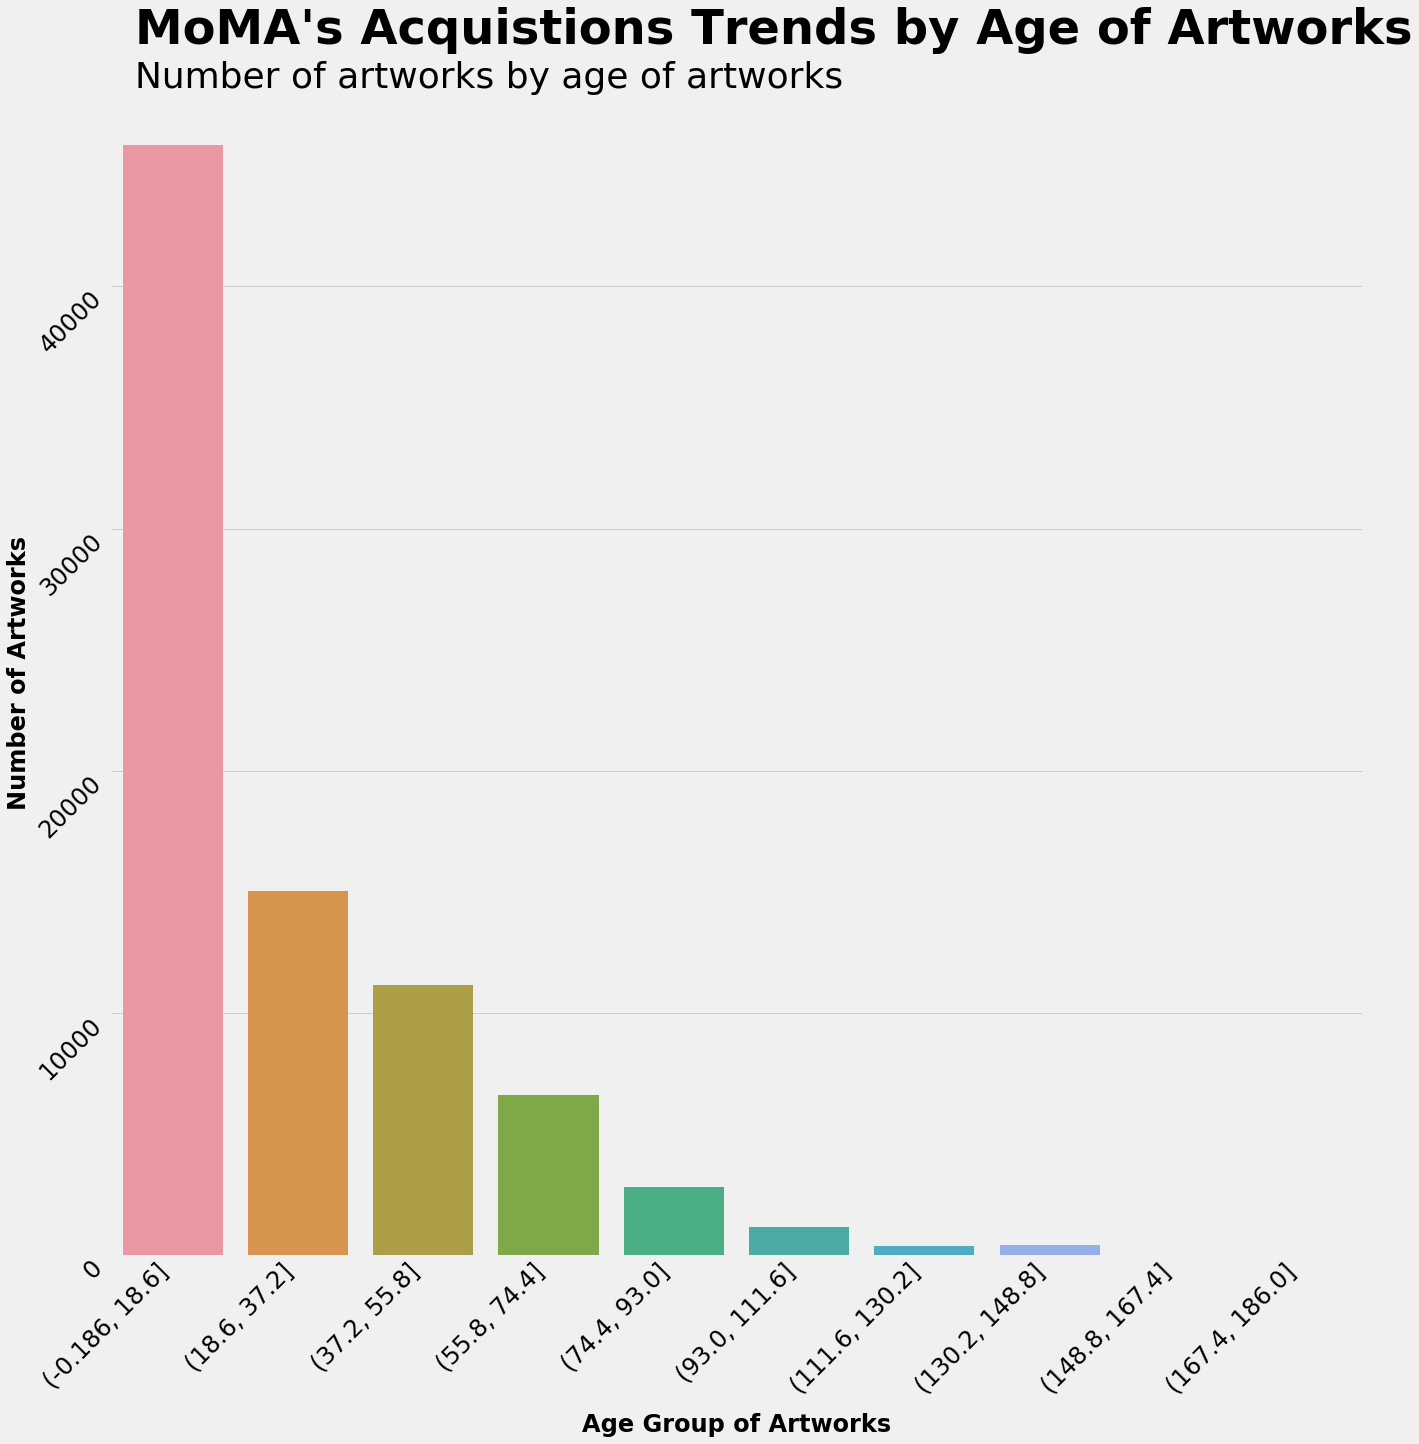

In [888]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_acquiredage_artwork = sns.countplot(
    data=master_copy,
    x=acquired_age_artwork_bins,
)

# set title and subtitle
chart_acquiredage_artwork.text(x=-0.3, y=50000, s="MoMA's Acquistions Trends by Age of Artworks", fontweight='bold', fontsize='48')
chart_acquiredage_artwork.text(x=-0.3, y=48200, s="Number of artworks by age of artworks", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artworks', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

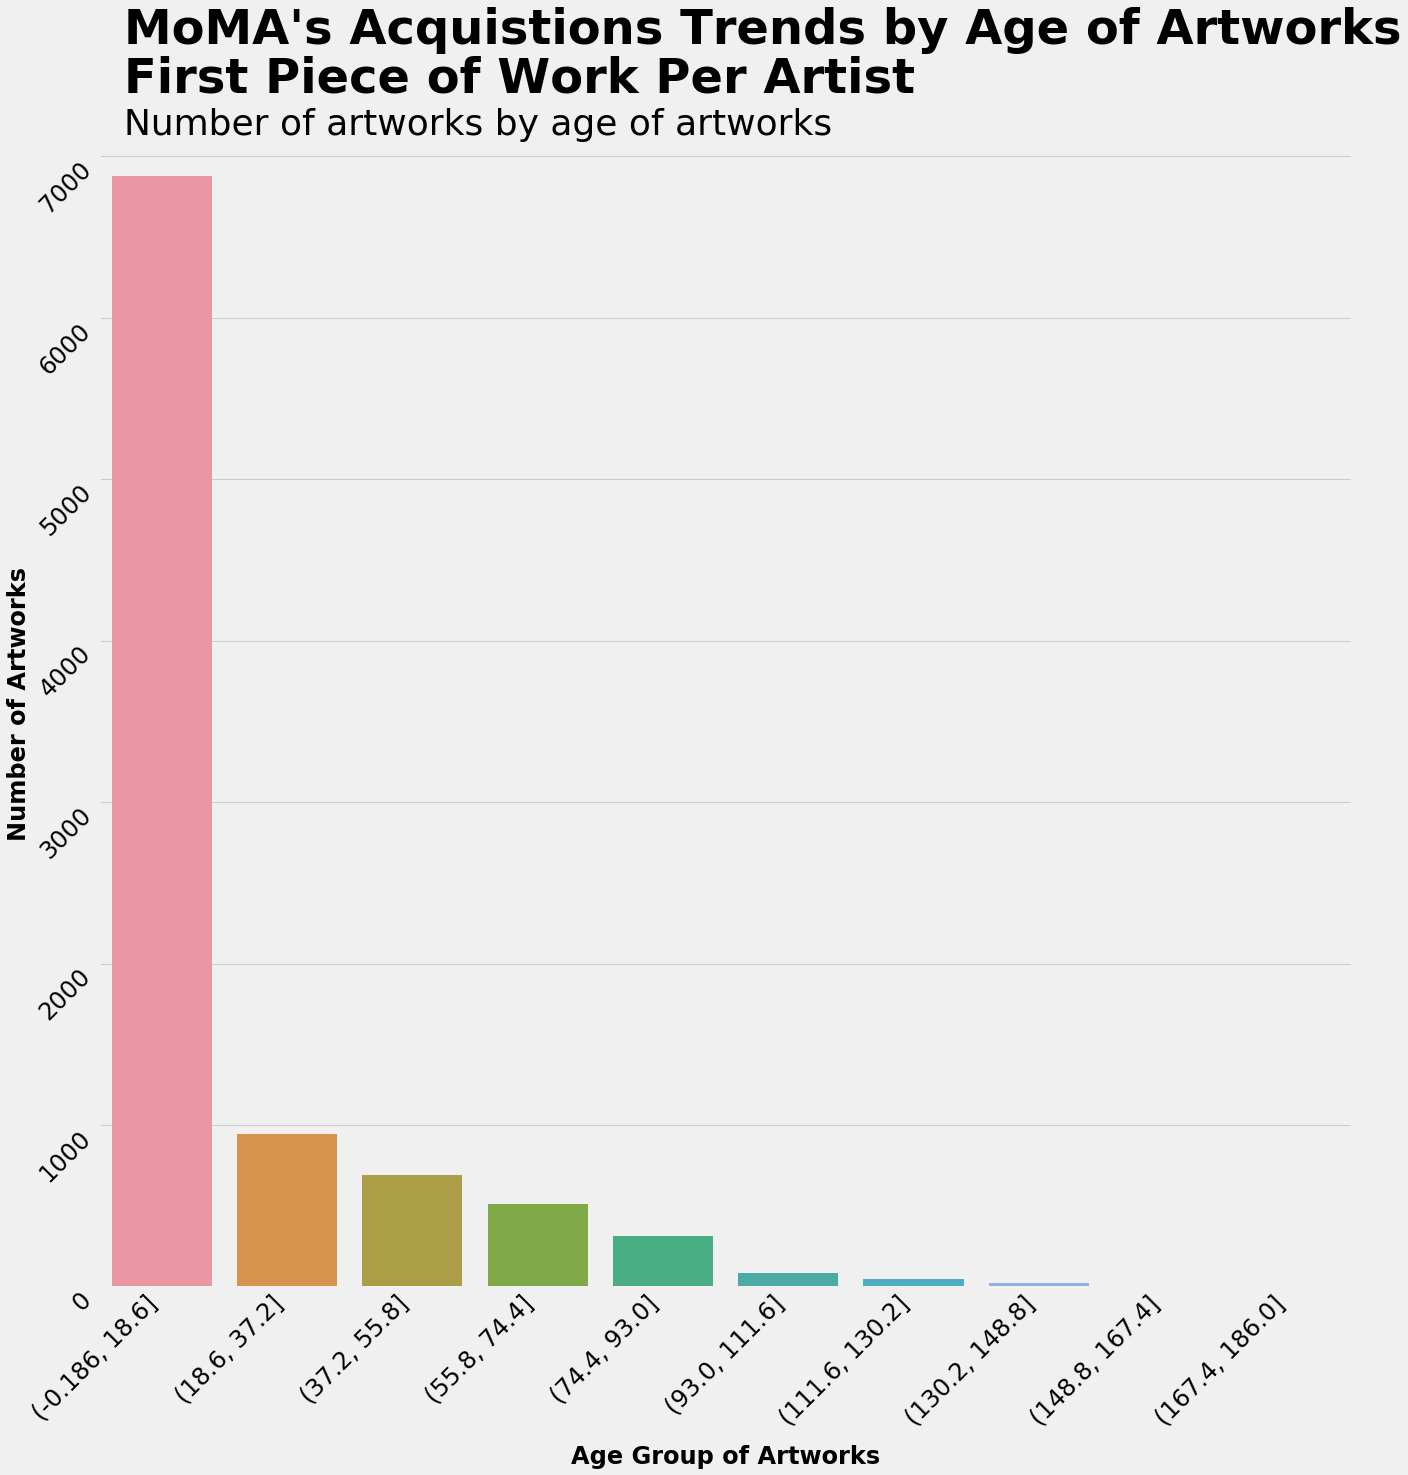

In [1073]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

chart_acquiredage_artwork_2 = sns.countplot(
    data=master_copy,
    x=acquired_age_artwork_bins_2,
)

# set title and subtitle
chart_acquiredage_artwork_2.text(x=-0.3, y=7700, s="MoMA's Acquistions Trends by Age of Artworks", fontweight='bold', fontsize='48')
chart_acquiredage_artwork_2.text(x=-0.3, y=7400, s="First Piece of Work Per Artist", fontweight='bold', fontsize='48')
chart_acquiredage_artwork_2.text(x=-0.3, y=7140, s="Number of artworks by age of artworks", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artworks', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

# Analysis by Crosstab DataFrames

## Bins of Age Group 

In [767]:
#created_age_artist_bins = pd.cut(master_copy['CreatedAge_Artist_2'], 10)

#labels = ["0%","25%","50%","75%"])

#acquired_age_artist_bins = pd.cut(master_copy['AcquiredAge_Artist_2'], 10)
#acquired_age_artwork_bins = pd.cut(master_copy['AcquiredAge_Artwork_2'], 10)

## Bins of Age Group 2 (For earliest work or youngest age only) 

In [1078]:
created_age_artist_bins_2 = pd.cut(master_copy_1['minValues_CreatedAge_Artist_2'], 10)
acquired_age_artist_bins_2 = pd.cut(master_copy_2['minValues_AcquiredAge_Artist_2'], 10)
acquired_age_artwork_bins_2 = pd.cut(master_copy_3['minValues_AcquiredAge_Artwork_2'], 10)

## CreditLine

In [1574]:
gender_fund = pd.crosstab(master_copy['Gender'], master_copy['CreditLine_Fund'])
gender_fund

CreditLine_Fund  False  True 
Gender                       
Female           12495   2886
Male             68447  16327
Non-Binary           0      1

In [1473]:
gender_gift = pd.crosstab(master_copy['Gender'], master_copy['CreditLine_Gift'])
gender_gift

CreditLine_Gift  False  True 
Gender                       
Female            6283   9098
Male             45562  39212
Non-Binary           1      0

In [1638]:
gender_anonymous = pd.crosstab(master_copy['Gender'], master_copy['CreditLine_Anonymous'])
gender_anonymous

CreditLine_Anonymous  False  True 
Gender                            
Female                15114    267
Male                  83909    865
Non-Binary                1      0

In [1639]:
gender_acquired = pd.crosstab(master_copy['Gender'], master_copy['CreditLine_Acquired'])
gender_acquired

CreditLine_Acquired  False  True 
Gender                           
Female               14440    941
Male                 81643   3131
Non-Binary               1      0

In [1640]:
gender_artist = pd.crosstab(master_copy['Gender'], master_copy['CreditLine_Artist'])
gender_artist

CreditLine_Artist  False  True 
Gender                         
Female             15194    187
Male               84353    421
Non-Binary             1      0

In [1428]:
Nationality_Am_fund = pd.crosstab(master_copy['Nationality_Am'], master_copy['CreditLine_Fund'])
Nationality_Am_fund

CreditLine_Fund  False  True 
Nationality_Am               
American         37989   7973
International    44100  11631

In [1641]:
Nationality_Am_gift = pd.crosstab(master_copy['Nationality_Am'], master_copy['CreditLine_Gift'])
Nationality_Am_gift

CreditLine_Gift  False  True 
Nationality_Am               
American         19695  26267
International    32643  23088

In [1643]:
Nationality_Am_anonymous = pd.crosstab(master_copy['Nationality_Am'], master_copy['CreditLine_Anonymous'])
Nationality_Am_anonymous

CreditLine_Anonymous  False  True 
Nationality_Am                    
American              45584    378
International         54954    777

In [1644]:
Nationality_Am_acquired = pd.crosstab(master_copy['Nationality_Am'], master_copy['CreditLine_Acquired'])
Nationality_Am_acquired

CreditLine_Acquired  False  True 
Nationality_Am                   
American             43636   2326
International        53978   1753

In [1645]:
Nationality_Am_artist = pd.crosstab(master_copy['Nationality_Am'], master_copy['CreditLine_Artist'])
Nationality_Am_artist

CreditLine_Artist  False  True 
Nationality_Am                 
American           45456    506
International      55611    120

In [1449]:
Acq_fund = pd.crosstab(acquired_age_artwork_bins, master_copy['CreditLine_Fund'])
Acq_fund

CreditLine_Fund        False  True 
AcquiredAge_Artwork_2              
(-0.186, 18.6]         33347  11785
(18.6, 37.2]           12764   2239
(37.2, 55.8]            9472   1595
(55.8, 74.4]            5820    783
(74.4, 93.0]            2231    560
(93.0, 111.6]            817    350
(111.6, 130.2]           226     79
(130.2, 148.8]           435     10
(148.8, 167.4]            26     11
(167.4, 186.0]             8      0

In [1461]:
Acq_gift = pd.crosstab(acquired_age_artwork_bins, master_copy['CreditLine_Gift'])
Acq_gift

CreditLine_Gift        False  True 
AcquiredAge_Artwork_2              
(-0.186, 18.6]         19639  25493
(18.6, 37.2]            7945   7058
(37.2, 55.8]            5633   5434
(55.8, 74.4]            4186   2417
(74.4, 93.0]            1323   1468
(93.0, 111.6]            682    485
(111.6, 130.2]           161    144
(130.2, 148.8]           354     91
(148.8, 167.4]            19     18
(167.4, 186.0]             3      5

<Figure size 432x288 with 0 Axes>

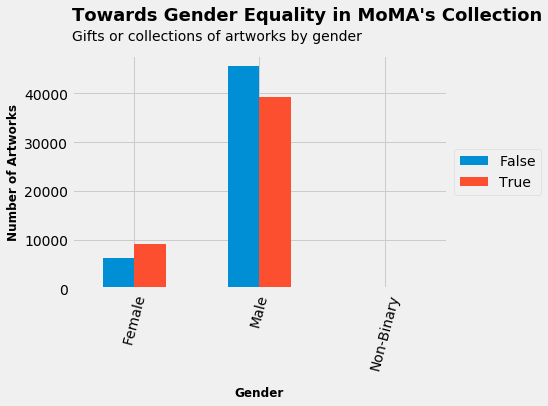

In [1752]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = gender_gift.plot.bar(stacked=False)

# set title and subtitle
ax.text(x=-0.5, y=55000, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-0.5, y=51000, s="Gifts or collections of artworks by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

<Figure size 432x288 with 0 Axes>

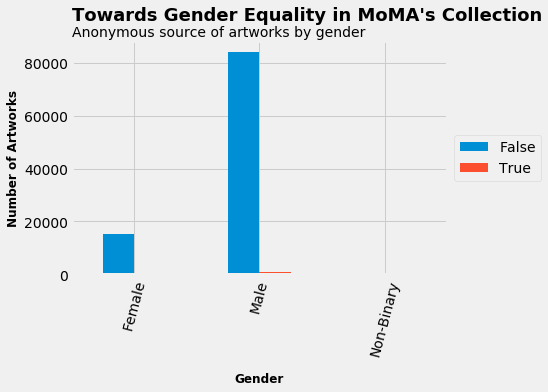

In [1625]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = gender_anonymous.plot.bar(stacked=False)

# set title and subtitle
ax.text(x=-0.5, y=96000, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-0.5, y=90000, s="Anonymous source of artworks by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

<Figure size 432x288 with 0 Axes>

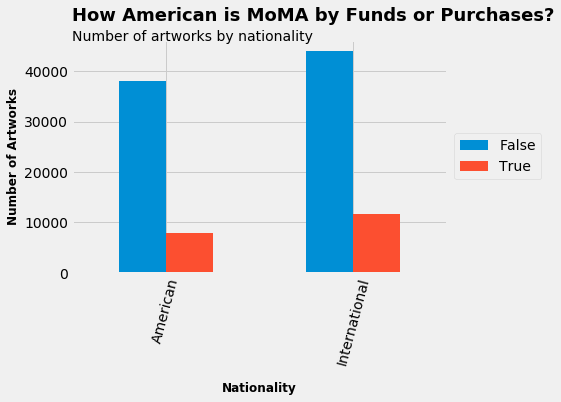

In [1767]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = Nationality_Am_fund.plot.bar(stacked=False)

# set title and subtitle
ax.text(x=-0.5, y=50000, s="How American is MoMA by Funds or Purchases?", fontweight='bold', fontsize='18')
ax.text(x=-0.5, y=46000, s="Number of artworks by nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Nationality', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

<Figure size 432x288 with 0 Axes>

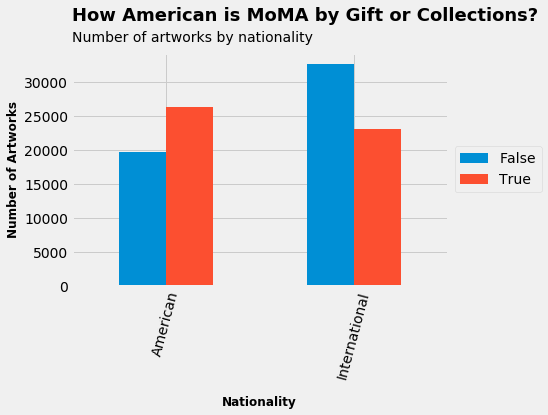

In [1765]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = Nationality_Am_gift.plot.bar(stacked=False)

# set title and subtitle
ax.text(x=-0.5, y=39000, s="How American is MoMA by Gift or Collections?", fontweight='bold', fontsize='18')
ax.text(x=-0.5, y=36000, s="Number of artworks by nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Nationality', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

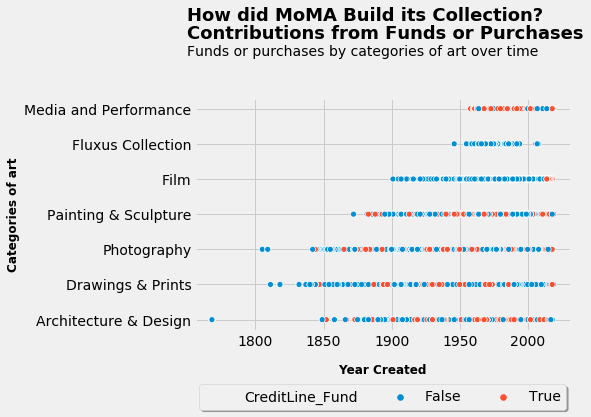

In [1768]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="Department", hue="CreditLine_Fund", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1750, y=8.5, s="How did MoMA Build its Collection?", fontweight='bold', fontsize='18')
ax.text(x=1750, y=8, s="Contributions from Funds or Purchases", fontweight='bold', fontsize='18')
ax.text(x=1750, y=7.5, s="Funds or purchases by categories of art over time", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Categories of art', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

plt.show()

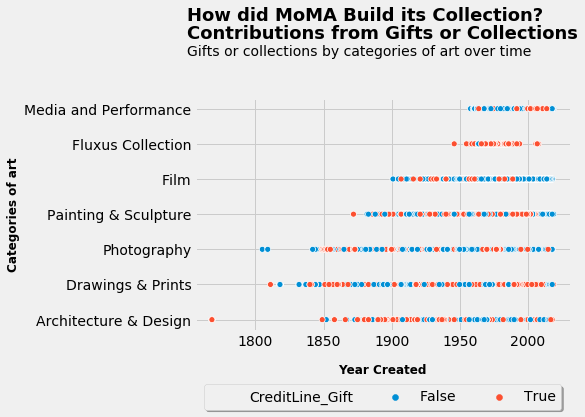

In [1769]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="Department", hue="CreditLine_Gift", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1750, y=8.5, s="How did MoMA Build its Collection?", fontweight='bold', fontsize='18')
ax.text(x=1750, y=8, s="Contributions from Gifts or Collections", fontweight='bold', fontsize='18')
ax.text(x=1750, y=7.5, s="Gifts or collections by categories of art over time", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Categories of art', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

plt.show()

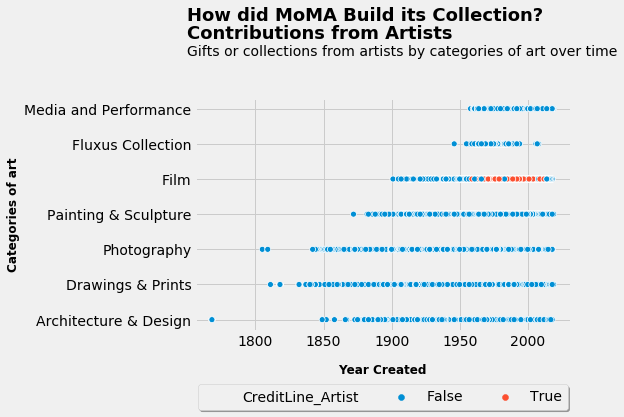

In [1770]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="Department", hue="CreditLine_Artist", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1750, y=8.5, s="How did MoMA Build its Collection?", fontweight='bold', fontsize='18')
ax.text(x=1750, y=8, s="Contributions from Artists", fontweight='bold', fontsize='18')
ax.text(x=1750, y=7.5, s="Gifts or collections from artists by categories of art over time", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Categories of art', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

plt.show()

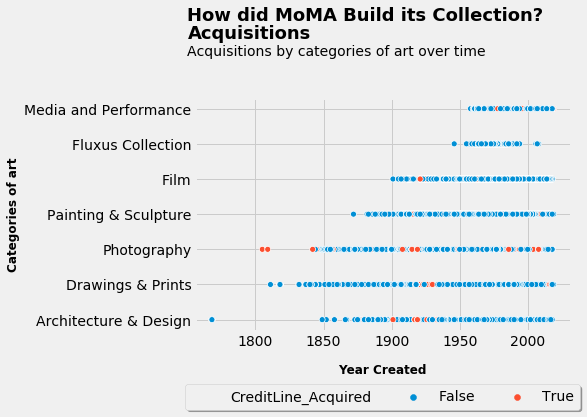

In [1761]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="Department", hue="CreditLine_Acquired", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1750, y=8.5, s="How did MoMA Build its Collection?", fontweight='bold', fontsize='18')
ax.text(x=1750, y=8, s="Acquisitions", fontweight='bold', fontsize='18')
ax.text(x=1750, y=7.5, s="Acquisitions by categories of art over time", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Categories of art', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

plt.show()

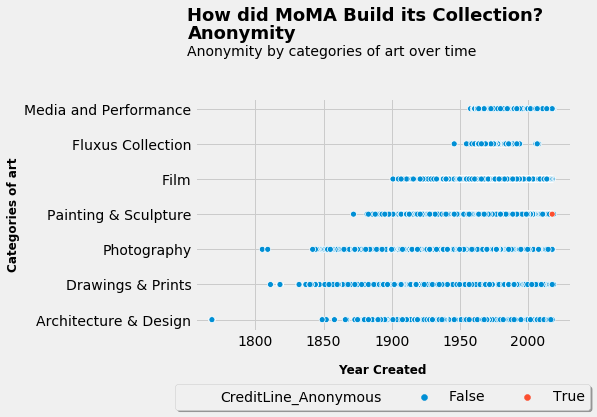

In [1760]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="Department", hue="CreditLine_Anonymous", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1750, y=8.5, s="How did MoMA Build its Collection?", fontweight='bold', fontsize='18')
ax.text(x=1750, y=8, s="Anonymity", fontweight='bold', fontsize='18')
ax.text(x=1750, y=7.5, s="Anonymity by categories of art over time", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Categories of art', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

plt.show()

## Gender 

In [ ]:
# NOTE: March 24, 2020 #
# future analysis coming:
# number of artist who have more than 1 work
# avg work per each artist, vs gender
# for top popular artists, avg work per each artist, vs gender/nationality/department

In [1416]:
department_date = pd.crosstab(created_age_artist_bins, master_copy['Gender'])
department_date

Gender               Female   Male  Non-Binary
CreatedAge_Artist_2                           
(-0.135, 13.5]            3     49           0
(13.5, 27.0]            885   5162           0
(27.0, 40.5]           5027  27082           1
(40.5, 54.0]           3834  22375           0
(54.0, 67.5]           1009  10670           0
(67.5, 81.0]            508   3893           0
(81.0, 94.5]           1877    449           0
(94.5, 108.0]           479     15           0

In [685]:
department_gender = pd.crosstab(master_copy['Department'], master_copy['Gender'])
department_gender

Gender                 Female   Male  Non-Binary
Department                                      
Architecture & Design    1689  10162           0
Drawings & Prints        9379  50189           0
Film                      266   1315           0
Fluxus Collection          64    415           0
Media and Performance     632   1802           1
Painting & Sculpture      494   2738           0
Photography              2951  19774           0

In [686]:
dept_gender_ratio = department_gender
dept_gender_ratio['Female-to-Male Ratio']= (department_gender['Female']/department_gender['Male'])*100

In [687]:
dept_gender_ratio

Gender                 Female   Male  Non-Binary  Female-to-Male Ratio
Department                                                            
Architecture & Design    1689  10162           0             16.620744
Drawings & Prints        9379  50189           0             18.687362
Film                      266   1315           0             20.228137
Fluxus Collection          64    415           0             15.421687
Media and Performance     632   1802           1             35.072142
Painting & Sculpture      494   2738           0             18.042367
Photography              2951  19774           0             14.923637

In [688]:
department_gender_male = pd.crosstab(male['Department'], male['Gender'])
department_gender_male

Gender                  Male
Department                  
Architecture & Design  10162
Drawings & Prints      50189
Film                    1315
Fluxus Collection        415
Media and Performance   1802
Painting & Sculpture    2738
Photography            19774

In [689]:
department_gender_fem = pd.crosstab(female['Department'], female['Gender'])
department_gender_fem

Gender                 Female
Department                   
Architecture & Design    1689
Drawings & Prints        9379
Film                      266
Fluxus Collection          64
Media and Performance     632
Painting & Sculpture      494
Photography              2951

In [690]:
nationality_am_gender = pd.crosstab(master_copy['Nationality_Am'], master_copy['Gender'])
nationality_am_gender

Gender          Female   Male  Non-Binary
Nationality_Am                           
American         10514  35781           0
International     4886  50198           1

In [1335]:
createdage_gender = pd.crosstab(created_age_artist_bins, master_copy['Gender'])
createdage_gender

Gender               Female   Male  Non-Binary
CreatedAge_Artist_2                           
(-0.135, 13.5]            3     49           0
(13.5, 27.0]            885   5162           0
(27.0, 40.5]           5027  27082           1
(40.5, 54.0]           3834  22375           0
(54.0, 67.5]           1009  10670           0
(67.5, 81.0]            508   3893           0
(81.0, 94.5]           1877    449           0
(94.5, 108.0]           479     15           0

In [692]:
createdage_gender_2 = createdage_gender
createdage_gender_2['Female-to-Male Ratio'] = (createdage_gender['Female']/createdage_gender['Male'])*100 
createdage_gender_2.drop(['Female','Male','Non-Binary'], axis=1)

Gender               Female-to-Male Ratio
CreatedAge_Artist_2                      
(-0.135, 13.5]                   6.122449
(13.5, 27.0]                    17.144518
(27.0, 40.5]                    18.562145
(40.5, 54.0]                    17.135196
(54.0, 67.5]                     9.456420
(67.5, 81.0]                    13.049062
(81.0, 94.5]                   418.040089
(94.5, 108.0]                 3193.333333

In [693]:
acquiredage_gender = pd.crosstab(acquired_age_artist_bins, master_copy['Gender'])
acquiredage_gender

Gender                Female   Male  Non-Binary
AcquiredAge_Artist_2                           
(0.798, 21.2]              2     43           0
(21.2, 41.4]            2624  13443           1
(41.4, 61.6]            3751  21489           0
(61.6, 81.8]            2916  21292           0
(81.8, 102.0]           4286  13209           0
(102.0, 122.2]           572   8480           0
(122.2, 142.4]            86   1816           0
(142.4, 162.6]            10   1037           0
(162.6, 182.8]             2    265           0
(182.8, 203.0]             3     39           0

In [902]:
acquiredage_aw_gender = pd.crosstab(acquired_age_artwork_bins, master_copy['Gender'])
acquiredage_aw_gender

Gender                 Female   Male  Non-Binary
AcquiredAge_Artwork_2                           
(-0.186, 18.6]           8892  36233           1
(18.6, 37.2]             1658  13047           0
(37.2, 55.8]             1344   9525           0
(55.8, 74.4]              565   5644           0
(74.4, 93.0]              433   2071           0
(93.0, 111.6]              31    887           0
(111.6, 130.2]              7    342           0
(130.2, 148.8]              2    442           0
(148.8, 167.4]              3     23           0
(167.4, 186.0]              0      8           0

## Trends in Acquisition by Gender 

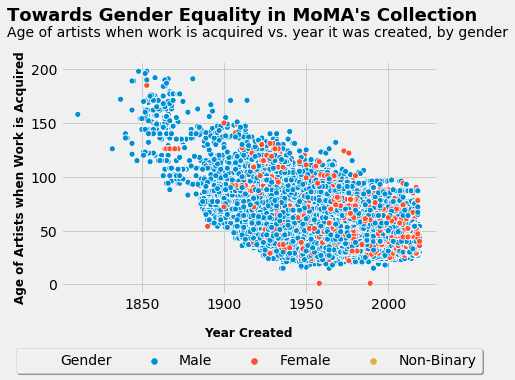

In [1332]:
master_copy['Date'] = master_copy['Date'].astype(float)
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="minValues_AcquiredAge_Artist_2", hue="Gender", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1768, y=245, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=1768, y=230, s="Age of artists when work is acquired vs. year it was created, by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age of Artists when Work is Acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

plt.show()

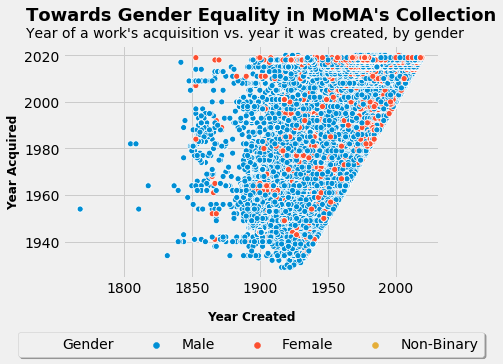

In [696]:
master_copy['Date'] = master_copy['Date'].astype(float)
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="DateAcquired_Year", hue="Gender", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1728, y=2035, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=1728, y=2028, s="Year of a work's acquisition vs. year it was created, by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Year Acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

<Figure size 720x720 with 0 Axes>

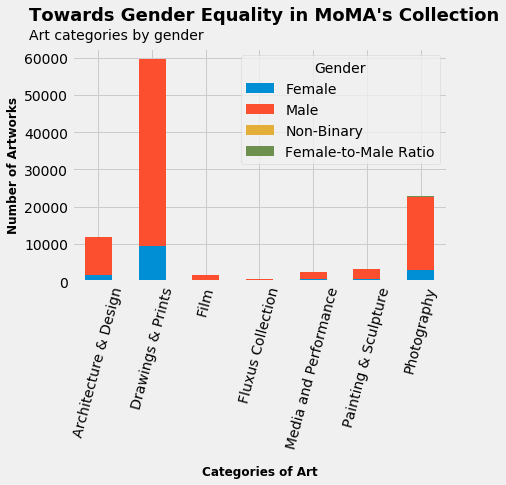

In [697]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,10))

ax = department_gender.plot.bar(stacked=True)

# set title and subtitle
ax.text(x=-1.3, y=70000, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-1.3, y=65000, s="Art categories by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Categories of Art', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)



plt.show();

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text yticklabel objects>)

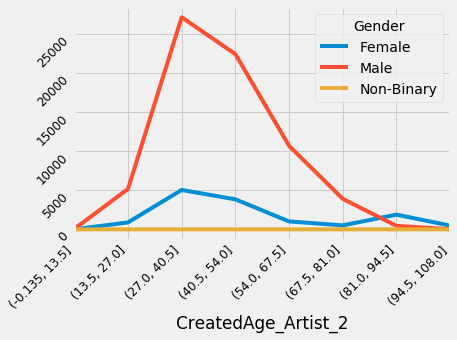

In [698]:
ax = createdage_gender.drop(['Female-to-Male Ratio'], axis=1).plot.line()

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12'  
)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 7 Text yticklabel objects>)

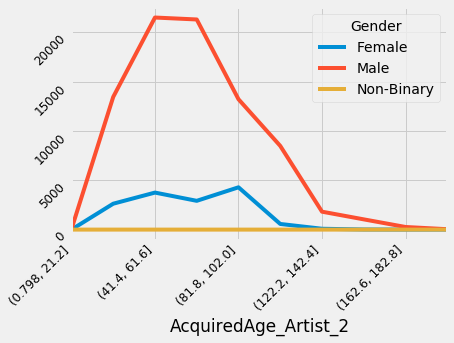

In [699]:
ax = acquiredage_gender.plot.line()

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12'  
)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]), <a list of 10 Text yticklabel objects>)

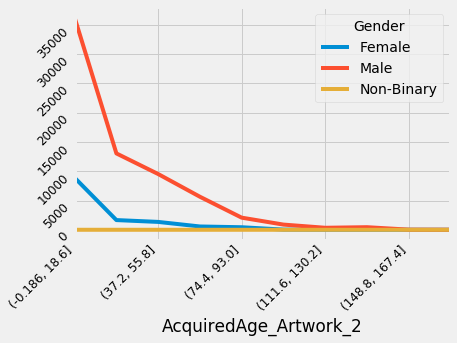

In [700]:
ax = acquiredage_aw_gender.plot.line()

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12'  
)

AttributeError: 'FacetGrid' object has no attribute 'legend'

<Figure size 1440x1440 with 0 Axes>

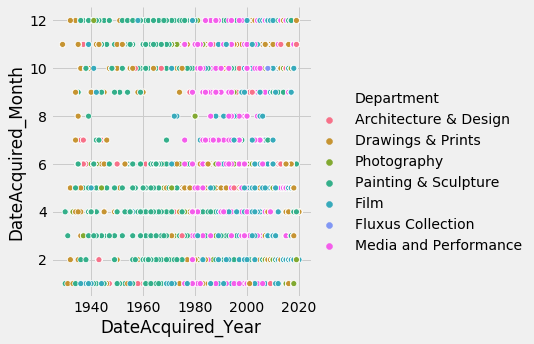

In [701]:
master_copy['Date'] = master_copy['Date'].astype(float)
plt.style.use('seaborn-colorblind')

fig = plt.figure(figsize=(20,20))
ax2 = sns.relplot(y="DateAcquired_Month", x="DateAcquired_Year", hue="Department", data=master_copy)

# move legend
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4)

# set title and subtitle
ax2.text(x=1935, y=13.5, s="Acquisition Trends in MoMA's Collection", fontweight='bold', fontsize='36')
ax2.text(x=1935, y=13, s="Year of acquisition vs. month of acquisition, by department", fontsize='24')

# set axis labels
plt.ylabel(ylabel='Month Acquired', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=24, fontweight='bold', labelpad=15)


plt.show()

## Nationality 

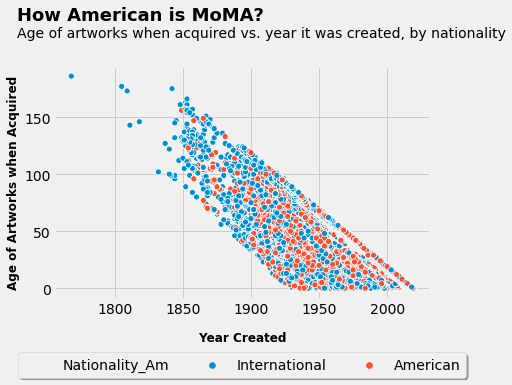

In [702]:
master_copy['Date'] = master_copy['Date'].astype(float)
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="AcquiredAge_Artwork_2", hue="Nationality_Am", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1728, y=235, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax.text(x=1728, y=220, s="Age of artworks when acquired vs. year it was created, by nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age of Artworks when Acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)


plt.show()


In [703]:
department_nationality = pd.crosstab(master_copy['Department'], master_copy['Nationality_Am'])
department_nationality

Nationality_Am         American  International
Department                                    
Architecture & Design      5510           7535
Drawings & Prints         24732          34844
Film                       1025            587
Fluxus Collection           321            196
Media and Performance      1090           1350
Painting & Sculpture       1751           1484
Photography               12383          10639

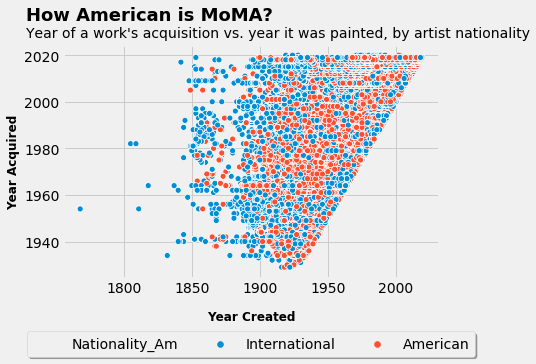

In [704]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax_dept_am = sns.scatterplot(x="Date", y="DateAcquired_Year", hue="Nationality_Am", data=master_copy)

# move legend
ax_dept_am.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax_dept_am.text(x=1728, y=2035, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax_dept_am.text(x=1728, y=2028, s="Year of a work's acquisition vs. year it was painted, by artist nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Year Acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

<Figure size 432x288 with 0 Axes>

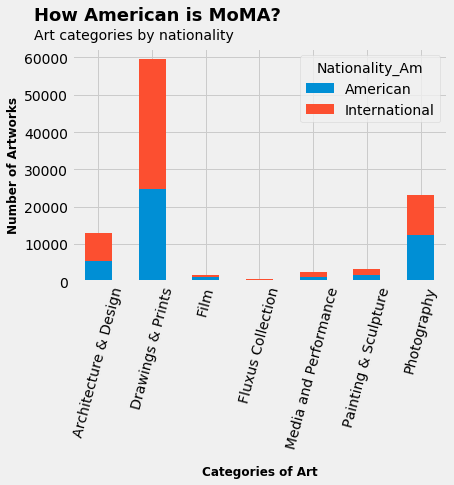

In [705]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = department_nationality.plot.bar(stacked=True)

# set title and subtitle
ax.text(x=-1.2, y=70000, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax.text(x=-1.2, y=65000, s="Art categories by nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Categories of Art', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

plt.show();

# Categories of Art

<Figure size 1440x1440 with 0 Axes>

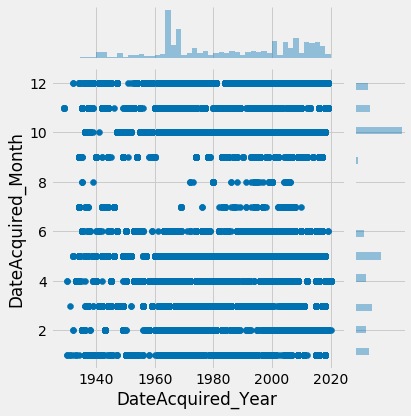

In [706]:
master_copy['Date'] = master_copy['Date'].astype(float)
plt.style.use('seaborn-colorblind')

fig = plt.figure(figsize=(20,20))
ax2 = sns.jointplot(x="DateAcquired_Year", y="DateAcquired_Month", data=master_copy)

# move legend
#ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          #fancybox=True, shadow=True, ncol=4)

# set title and subtitle
#ax2.text(x=1135, y=10, s="Acquisition Trends in MoMA's Collection", fontweight='bold', fontsize='36')
#ax2.text(x=1135, y=10, s="Year of acquisition vs. month of acquisition, by department", fontsize='24')

# set axis labels
#plt.ylabel(ylabel='Month Acquired', fontsize=12, fontweight='bold')
#plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

## Age Group

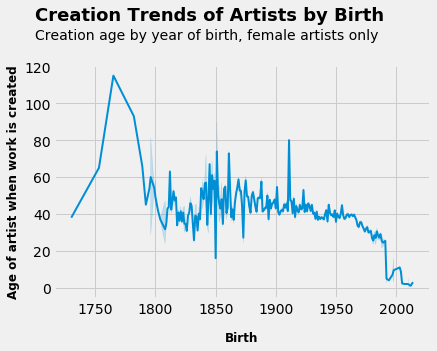

In [1666]:
#sns.lineplot(x='Birth', y='CreatedAge_Artist_2', data=master_copy)

plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = sns.lineplot(linewidth=2,x='Birth', y='CreatedAge_Artist_2', data=master_copy)

# set title and subtitle
plt.text(1700, 145, s="Creation Trends of Artists by Birth", fontweight='bold', fontsize='18')
ax.text(1700, 135, s="Creation age by year of birth, female artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age of artist when work is created', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Birth', fontsize=12, fontweight='bold', labelpad=15)

# move legend
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

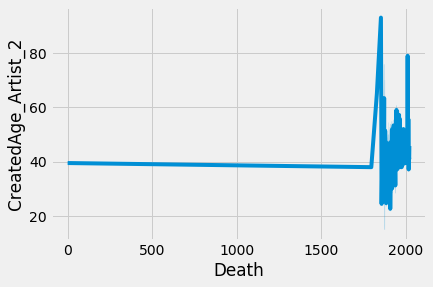

In [1320]:
sns.lineplot(x='Death', y='CreatedAge_Artist_2', data=master_copy)

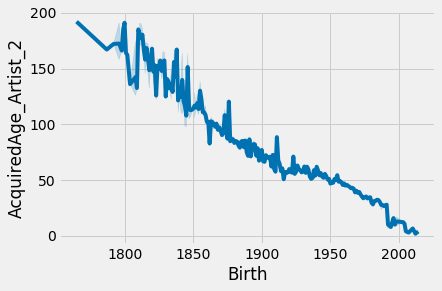

In [708]:
sns.lineplot(x='Birth', y='AcquiredAge_Artist_2', data=master_copy)

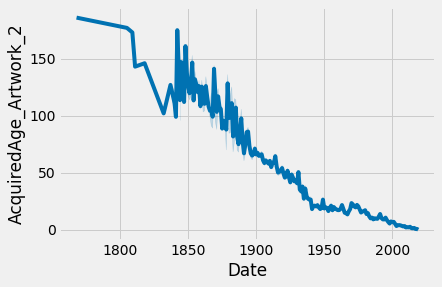

In [709]:
sns.lineplot(x='Date', y='AcquiredAge_Artwork_2', data=master_copy)

In [710]:
mean_male = male['AcquiredAge_Artist_2'].mean()

means = [male['AcquiredAge_Artist_2'].mean(), female['AcquiredAge_Artist_2'].mean()]

In [711]:
label = ['Male', 'Female']

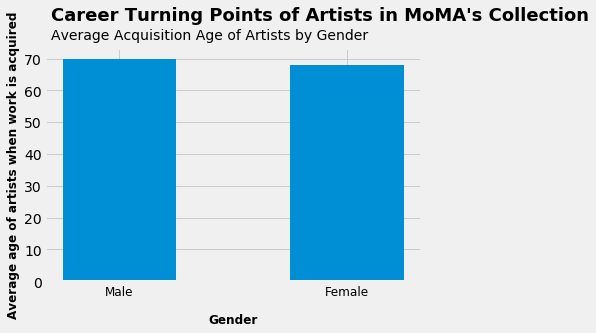

In [1586]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

# arange is numpymethod that generates an array of sequential numbers
index = np.arange(len(label))

plt.bar(index, means, width=0.5, align='center')

# set title and subtitle
plt.text(x=-.3, y=82, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
plt.text(x=-.3, y=76, s="Average Acquisition Age of Artists by Gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Average age of artists when work is acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(index, label, fontsize=12, rotation=0)


plt.show()

In [1105]:
mean_male_2 = male['minValues_AcquiredAge_Artist_2'].mean()

means_2 = [male['minValues_AcquiredAge_Artist_2'].mean(), female['minValues_AcquiredAge_Artist_2'].mean()]

In [1103]:
label_2 = ['Male_2', 'Female_2']

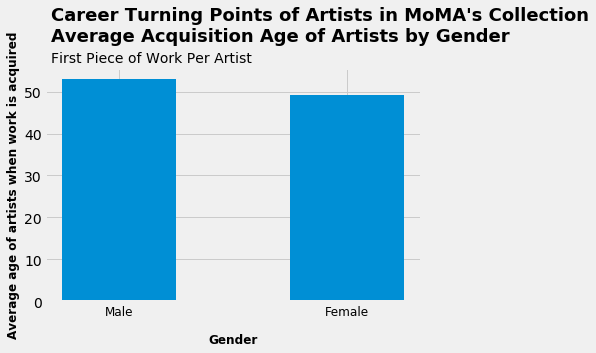

In [1587]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

# arange is numpymethod that generates an array of sequential numbers
index = np.arange(len(label_2))

plt.bar(index, means_2, width=0.5, align='center')

# set title and subtitle
plt.text(x=-.3, y=67, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
plt.text(x=-.3, y=62, s="Average Acquisition Age of Artists by Gender", fontweight='bold', fontsize='18')
plt.text(x=-.3, y=57, s="First Piece of Work Per Artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Average age of artists when work is acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(index, label, fontsize=12, rotation=0)


plt.show()

In [713]:
ct_dep_f_1 = pd.crosstab(female['DateAcquired'], female['Department'])


ct_dep_m_1 = pd.crosstab(male['DateAcquired'], male['Department'])

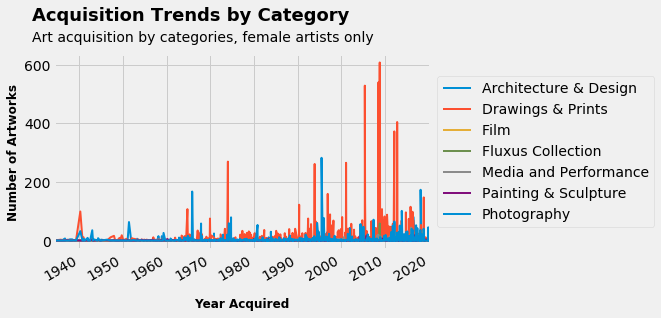

In [714]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_f_1.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(704250, 750, s="Acquisition Trends by Category", fontweight='bold', fontsize='18')
ax.text(704250, y=680, s="Art acquisition by categories, female artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

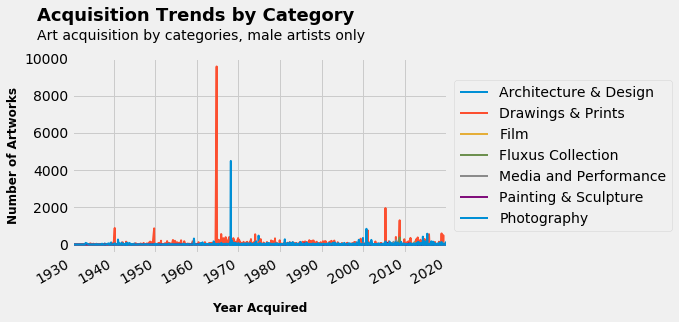

In [715]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_m_1.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(701500, 12000, s="Acquisition Trends by Category", fontweight='bold', fontsize='18')
ax.text(701500, y=11000, s="Art acquisition by categories, male artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

In [716]:
ct_dep_f_2 = pd.crosstab(female['Date'], female['Department'])


ct_dep_m_2 = pd.crosstab(male['Date'], male['Department'])


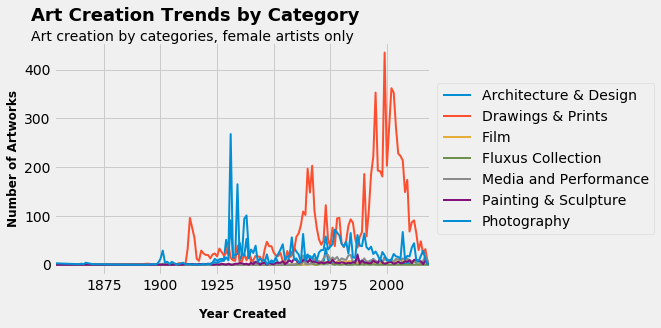

In [717]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_f_2.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(1843, 500, s="Art Creation Trends by Category", fontweight='bold', fontsize='18')
ax.text(1843, 460, s="Art creation by categories, female artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

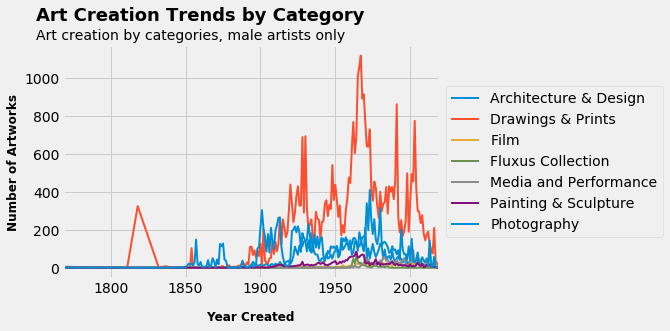

In [718]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_m_2.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(1750, 1300, s="Art Creation Trends by Category", fontweight='bold', fontsize='18')
ax.text(1750, 1200, s="Art creation by categories, male artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

In [1130]:
ct_dep_f_3 = pd.crosstab(female['minValues_AcquiredAge_Artwork_2'], female['Department'])
ct_dep_f_3

ct_dep_m_3 = pd.crosstab(male['minValues_AcquiredAge_Artwork_2'], male['Department'])
ct_dep_m_3

Department                       Architecture & Design  Drawings & Prints  \
minValues_AcquiredAge_Artwork_2                                             
0.0                                               1870              22958   
1.0                                               1078               8070   
2.0                                               2494               2807   
3.0                                                235               1247   
4.0                                                183                451   
...                                                ...                ...   
161.0                                                0                  0   
173.0                                                0                  0   
175.0                                                0                  0   
177.0                                                0                  0   
186.0                                                5                  0   

Department                       Film  Fluxus Collection  \
minValues_AcquiredAge_Artwork_2                            
0.0                               256                 90   
1.0                               155                 69   
2.0                                75                  6   
3.0                                43                  0   
4.0                                22                  0   
...                               ...                ...   
161.0                               0                  0   
173.0                               0                  0   
175.0                               0                  0   
177.0                               0                  0   
186.0                               0                  0   

Department                       Media and Performance  Painting & Sculpture  \
minValues_AcquiredAge_Artwork_2                                                
0.0                                                792                  1268   
1.0                                                288                   616   
2.0                                                 87                   164   
3.0                                                349                    69   
4.0                                                 16                    32   
...                                                ...                   ...   
161.0                                                0                     0   
173.0                                                0                     0   
175.0                                                0                     0   
177.0                                                0                     0   
186.0                                                0                     0   

Department                       Photography  
minValues_AcquiredAge_Artwork_2               
0.0                                     9583  
1.0                                     2306  
2.0                                     1924  
3.0                                      426  
4.0                                      263  
...                                      ...  
161.0                                      5  
173.0                                      1  
175.0                                      1  
177.0                                      1  
186.0                                      0  

[148 rows x 7 columns]

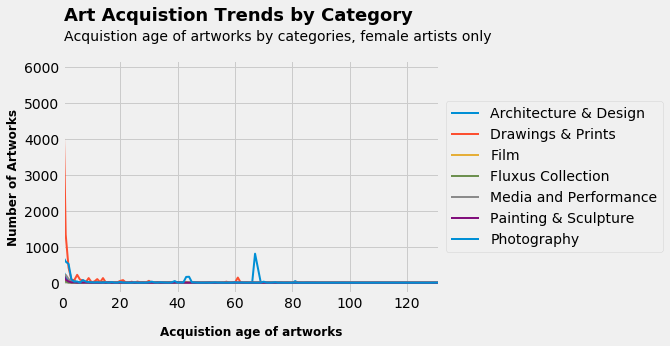

In [1311]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_f_3.plot.line(linewidth=2, ax=ax)
# set log
#plt.yscale('log')

# set title and subtitle
plt.text(0.3, 7300, s="Art Acquistion Trends by Category", fontweight='bold', fontsize='18')
ax.text(0.3, 6750, s="Acquistion age of artworks by categories, female artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Acquistion age of artworks', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

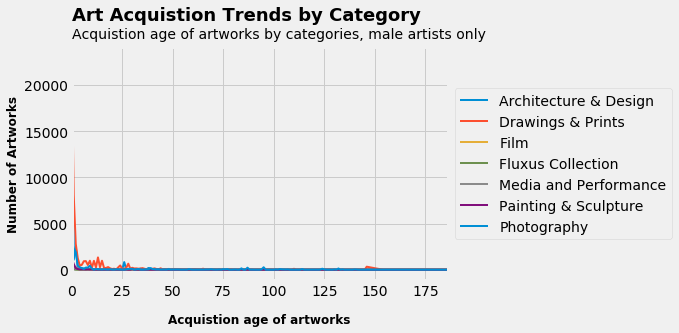

In [1310]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_m_3.plot.line(linewidth=2, ax=ax)

# set log
# plt.yscale('log')

# set title and subtitle
plt.text(0.3, 27000, s="Art Acquistion Trends by Category", fontweight='bold', fontsize='18')
ax.text(0.3, 25050, s="Acquistion age of artworks by categories, male artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Acquistion age of artworks', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

In [1133]:
ct_dep_f_4 = pd.crosstab(female['minValues_CreatedAge_Artist_2'], female['Department'])
ct_dep_f_4

ct_dep_m_4 = pd.crosstab(male['minValues_CreatedAge_Artist_2'], male['Department'])
ct_dep_m_4

Department                     Architecture & Design  Drawings & Prints  Film  \
minValues_CreatedAge_Artist_2                                                   
0.0                                                0                  3     0   
1.0                                                0                 84     3   
4.0                                                0                  1     0   
5.0                                                0                  1     0   
6.0                                               12                  0     0   
...                                              ...                ...   ...   
84.0                                               0                  4     0   
85.0                                               3                  0     0   
87.0                                               0                 10     0   
91.0                                               1                  1     0   
93.0                                               1                  0     0   

Department                     Fluxus Collection  Media and Performance  \
minValues_CreatedAge_Artist_2                                             
0.0                                            0                      0   
1.0                                            0                      2   
4.0                                            0                      0   
5.0                                            0                      0   
6.0                                            0                      0   
...                                          ...                    ...   
84.0                                           0                      0   
85.0                                           0                      0   
87.0                                           0                      0   
91.0                                           0                      0   
93.0                                           0                      0   

Department                     Painting & Sculpture  Photography  
minValues_CreatedAge_Artist_2                                     
0.0                                               0            0  
1.0                                               1            2  
4.0                                               0           10  
5.0                                               0            0  
6.0                                               0            0  
...                                             ...          ...  
84.0                                              0            0  
85.0                                              0            0  
87.0                                              0            0  
91.0                                              0            0  
93.0                                              0            0  

[84 rows x 7 columns]

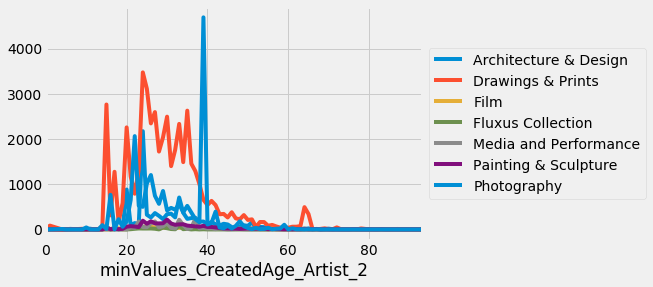

In [1134]:
ax = ct_dep_m_4.plot.line()
# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

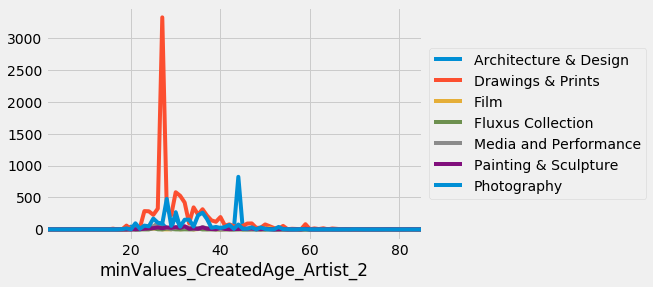

In [1135]:
ax = ct_dep_f_4.plot.line()
# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [1137]:
ct_dep_f_5 = pd.crosstab(female['minValues_AcquiredAge_Artist_2'], female['Department'])
ct_dep_f_5

ct_dep_m_5 = pd.crosstab(male['minValues_AcquiredAge_Artist_2'], male['Department'])
ct_dep_m_5

Department                      Architecture & Design  Drawings & Prints  \
minValues_AcquiredAge_Artist_2                                             
1.0                                                 2                  0   
15.0                                                3                  2   
16.0                                                0                  1   
17.0                                                0                  3   
18.0                                                0                  2   
...                                               ...                ...   
190.0                                               0                  0   
191.0                                               3                  0   
192.0                                               0                  0   
196.0                                               0                  0   
198.0                                               0                  0   

Department                      Film  Fluxus Collection  \
minValues_AcquiredAge_Artist_2                            
1.0                                0                  0   
15.0                               0                  0   
16.0                               0                  0   
17.0                               0                  0   
18.0                               0                  0   
...                              ...                ...   
190.0                              0                  0   
191.0                              0                  0   
192.0                              0                  0   
196.0                              0                  0   
198.0                              0                  0   

Department                      Media and Performance  Painting & Sculpture  \
minValues_AcquiredAge_Artist_2                                                
1.0                                                 0                     0   
15.0                                                0                     1   
16.0                                                0                     1   
17.0                                                0                     0   
18.0                                                0                     0   
...                                               ...                   ...   
190.0                                               0                     0   
191.0                                               0                     0   
192.0                                               0                     0   
196.0                                               0                     0   
198.0                                               0                     0   

Department                      Photography  
minValues_AcquiredAge_Artist_2               
1.0                                       0  
15.0                                      0  
16.0                                      0  
17.0                                      0  
18.0                                     10  
...                                     ...  
190.0                                     3  
191.0                                     1  
192.0                                     1  
196.0                                     1  
198.0                                     7  

[171 rows x 7 columns]

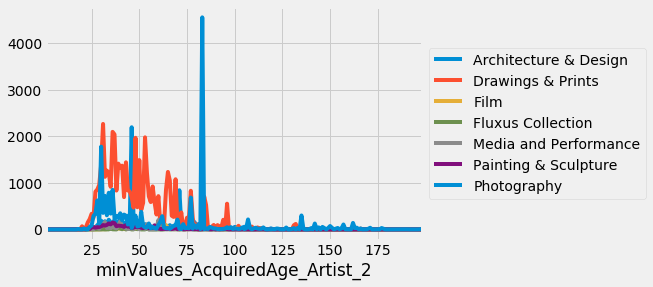

In [1138]:
ax = ct_dep_m_5.plot.line()
# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

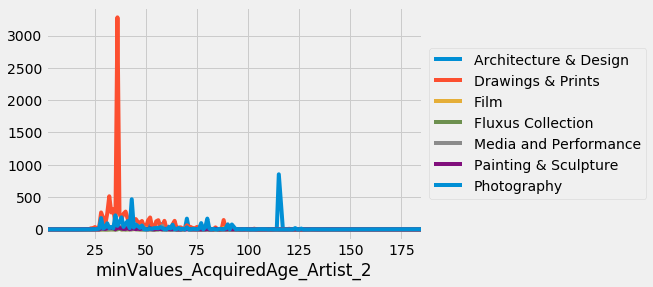

In [1274]:
ax = ct_dep_f_5.plot.line()
# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [1276]:
ct_dep_f_6 = pd.crosstab(female['Date'], female['Department'])
ct_dep_f_6

ct_dep_m_6 = pd.crosstab(male['Date'], male['Department'])
ct_dep_m_6

Department  Architecture & Design  Drawings & Prints  Film  Fluxus Collection  \
Date                                                                            
1768.0                          5                  0     0                  0   
1805.0                          0                  0     0                  0   
1809.0                          0                  0     0                  0   
1811.0                          0                  1     0                  0   
1818.0                          0                324     0                  0   
...                           ...                ...   ...                ...   
2015.0                          6                 75    15                  0   
2016.0                         16                209     9                  0   
2017.0                          6                 33     9                  0   
2018.0                          0                 24     4                  0   
2019.0                          0                  6     0                  0   

Department  Media and Performance  Painting & Sculpture  Photography  
Date                                                                  
1768.0                          0                     0            0  
1805.0                          0                     0            1  
1809.0                          0                     0            1  
1811.0                          0                     0            0  
1818.0                          0                     0            0  
...                           ...                   ...          ...  
2015.0                          3                     7            8  
2016.0                          4                     5           58  
2017.0                          3                     3            5  
2018.0                          1                     1            2  
2019.0                          2                     2            0  

[185 rows x 7 columns]

(array([1750., 1800., 1850., 1900., 1950., 2000., 2050.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

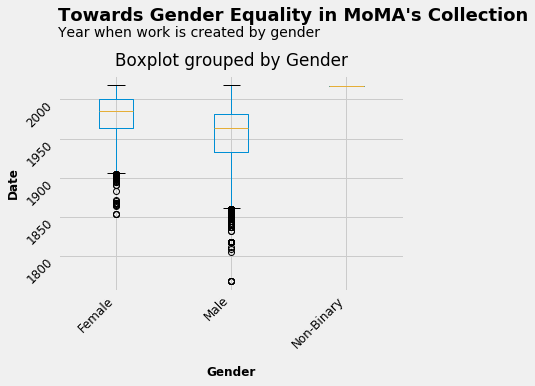

In [1292]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='Date', by='Gender')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=2100, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=2080, s="Year when work is created by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Date', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-50.,   0.,  50., 100., 150., 200.]),
 <a list of 6 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

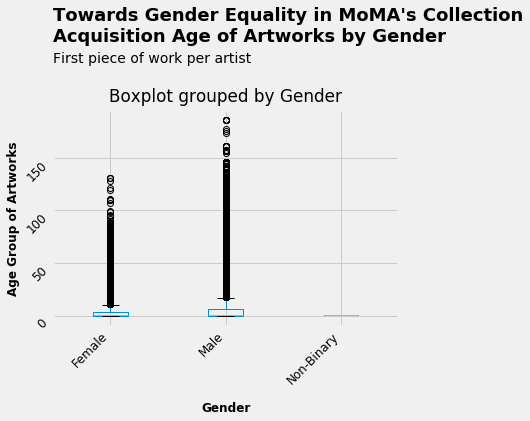

In [1269]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_AcquiredAge_Artwork_2', by='Gender')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=280, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=260, s="Acquisition Age of Artworks by Gender", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=240, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

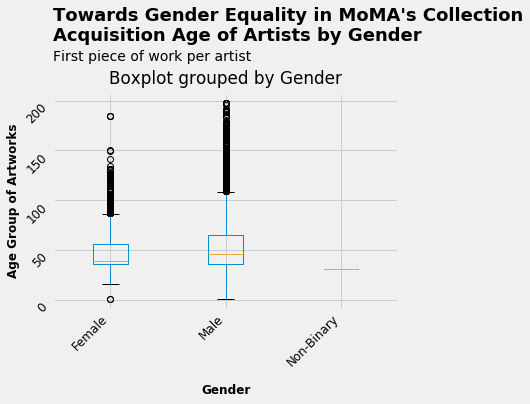

In [1265]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_AcquiredAge_Artist_2', by='Gender')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=280, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=260, s="Acquisition Age of Artists by Gender", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=240, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

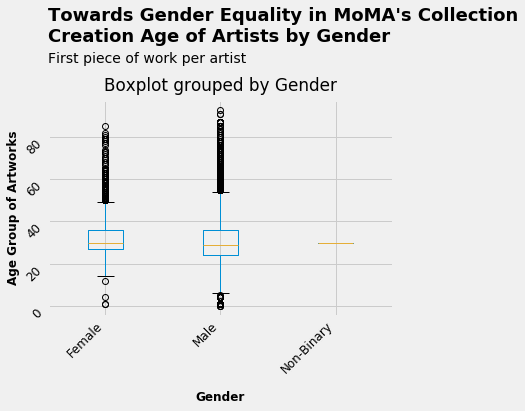

In [1520]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_CreatedAge_Artist_2', by='Gender')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=135, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=125, s="Creation Age of Artists by Gender", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=115, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150.]),
 <a list of 8 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

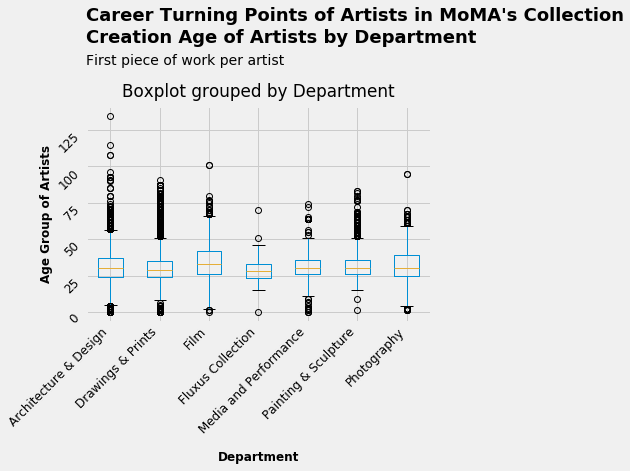

In [1588]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_CreatedAge_Artist_2', by='Department')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=200, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=185, s="Creation Age of Artists by Department", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=170, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artists', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Department', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-50.,   0.,  50., 100., 150., 200.]),
 <a list of 6 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

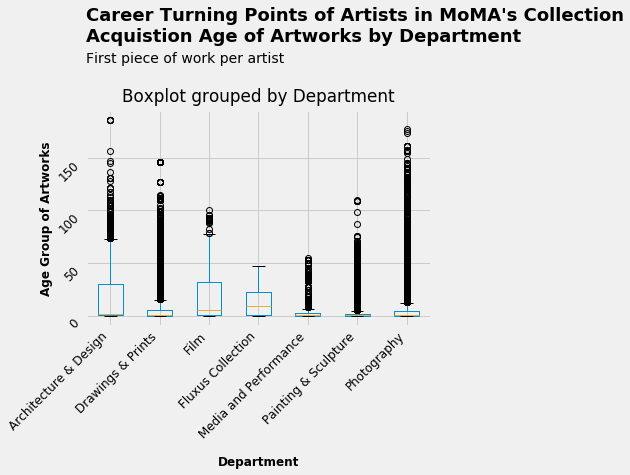

In [1589]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_AcquiredAge_Artwork_2', by='Department')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=280, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=260, s="Acquistion Age of Artworks by Department", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=240, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Department', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

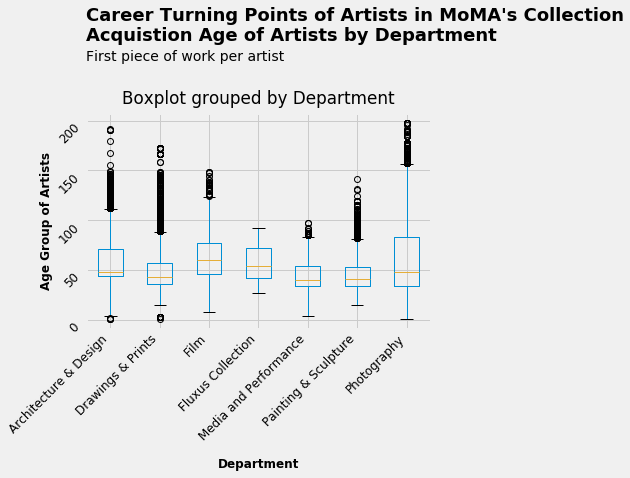

In [1590]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_AcquiredAge_Artist_2', by='Department')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=300, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=280, s="Acquistion Age of Artists by Department", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=260, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artists', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Department', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150.]),
 <a list of 8 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

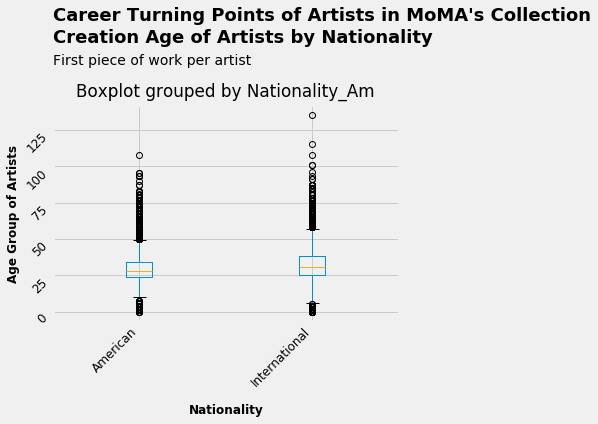

In [1591]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_CreatedAge_Artist_2', by='Nationality_Am')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=200, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=185, s="Creation Age of Artists by Nationality", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=170, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artists', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Nationality', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

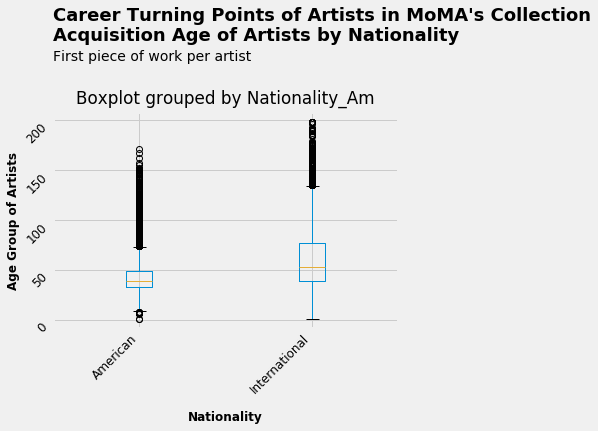

In [1592]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_AcquiredAge_Artist_2', by='Nationality_Am')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
ax.text(x=0.5, y=300, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=280, s="Acquisition Age of Artists by Nationality", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=260, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artists', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Nationality', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([-50.,   0.,  50., 100., 150., 200.]),
 <a list of 6 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

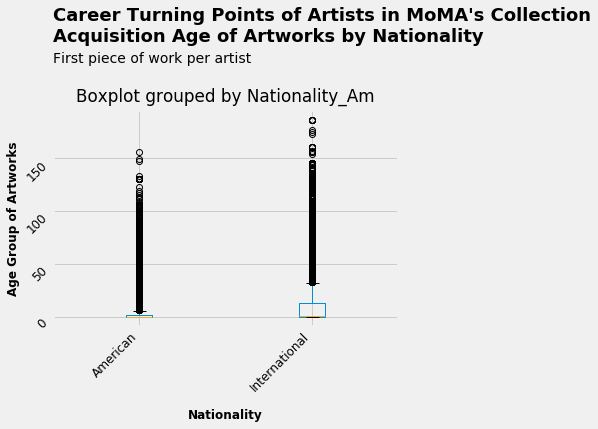

In [1593]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = master_copy.boxplot(column='minValues_AcquiredAge_Artwork_2', by='Nationality_Am')

title_boxplot = ''
plt.title( title_boxplot )

# set title and subtitle
# set title and subtitle
ax.text(x=0.5, y=280, s="Career Turning Points of Artists in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=260, s="Acquisition Age of Artworks by Nationality", fontweight='bold', fontsize='18')
ax.text(x=0.5, y=240, s="First piece of work per artist", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age Group of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Nationality', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

<Figure size 720x720 with 0 Axes>

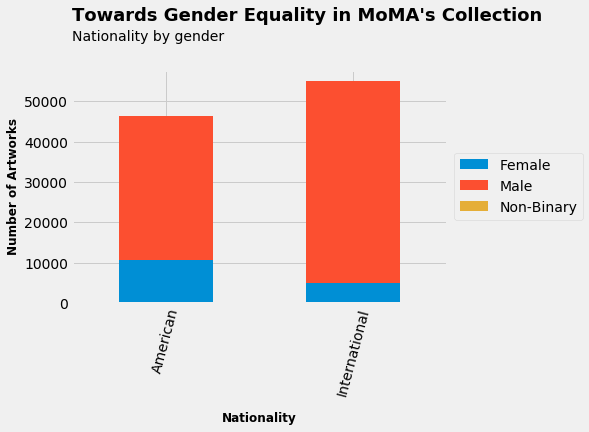

In [1595]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,10))

ax = nationality_am_gender.plot.bar(stacked=True)

# set title and subtitle
ax.text(x=-0.5, y=70000, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-0.5, y=65000, s="Nationality by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Nationality', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

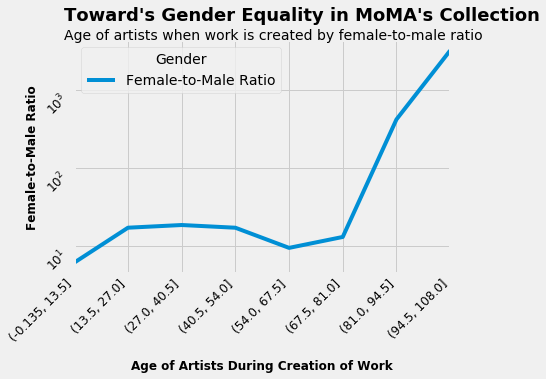

In [733]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = createdage_gender_2.drop(['Female','Male', 'Non-Binary'], axis=1).plot.line()

# set title and subtitle
ax.text(x=-0.2, y=7800, s="Toward's Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-0.2, y=4500, s="Age of artists when work is created by female-to-male ratio", fontsize='14')

# set log
plt.yscale('log')

# set axis labels
plt.ylabel(ylabel='Female-to-Male Ratio', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Age of Artists During Creation of Work', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

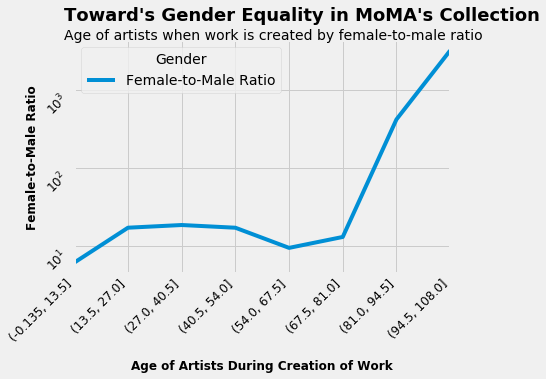

In [736]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = createdage_gender_2.drop(['Female','Male', 'Non-Binary'], axis=1).plot.line()

# set title and subtitle
ax.text(x=-0.2, y=7800, s="Toward's Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-0.2, y=4500, s="Age of artists when work is created by female-to-male ratio", fontsize='14')

# set log
plt.yscale('log')

# set axis labels
plt.ylabel(ylabel='Female-to-Male Ratio', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Age of Artists During Creation of Work', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')

(array([10., 15., 20., 25., 30., 35., 40.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

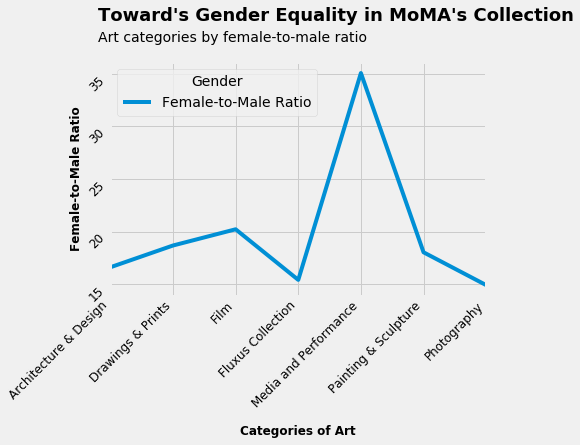

In [738]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = dept_gender_ratio.drop(['Female','Male', 'Non-Binary'], axis=1).plot.line()

# set title and subtitle
ax.text(x=-0.2, y=40, s="Toward's Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-0.2, y=38, s="Art categories by female-to-male ratio", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Female-to-Male Ratio', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Categories of Art', fontsize=12, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='12')

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='12')